In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nfl_data_py as nfl

# Define the years to import
yrs = range(2019, 2020)
#yrs = 2022

# Play-by-Play Data
pbp_data = nfl.import_pbp_data(years=yrs)

# Player Stats
#player_stats = nfl.import_seasonal_data(years=yrs, s_type='ALL')

# Weekly Rosters
#weekly_rosters = nfl.import_weekly_rosters(years=yrs)

# Schedules
#schedules = nfl.import_schedules(years=yrs)

# Injuries
#injuries = nfl.import_injuries(years=yrs)

# Draft Data
#draft_data = nfl.import_draft_picks(years=yrs)

# Combine Data
#combine_data = nfl.import_combine_data(years=yrs)

# Weekly Fantasy Data
weekly_fantasy_data = nfl.import_weekly_data(years=yrs)

# Officiating Data
#officiating_data = nfl.import_officials(years=yrs)

# Betting Lines
#betting_lines = nfl.import_sc_lines(yrs)

# Depth Charts
depth_charts = nfl.import_depth_charts(years=yrs)

# Next Gen Stats
#next_gen_stats = nfl.import_ngs_data(years=yrs, stat_type='passing')

2019 done.
Downcasting floats.
Downcasting floats.


In [ ]:
#nfl.import_contracts()

In [ ]:
#nfl.import_ngs_data(years=yrs, stat_type='receiving').columns

Attempt to make a dvoa-type metric. Explore how downs impact expected points to make a better epa. 
- Points Above Replacement [PAR]
- First Down Above Replacement [FDAR] how likely are you to obtain another first down on this drive?

Use strength of schedule and matchups to weight player performance. Include situations like 4th quarter.

Can I predict snap count of players? If so, does that help predict points or yards?

Make multiple functions that take in past data (play-by-play) 
- summarize the data by predicting the play outcome (yardage gained, score, 1st down)

Make a function that is able to summarize the effect of each variable on the outcome of the play

So, if each play occurs after the prior; I can make a cumulative sum that tracks the performance of teams
- New features like: Of last 100 plays how many have been touchdowns? How many have been sacks?
- total plays played

Can I feed all columns into a model to predict the future?
- Should I predict the next play? The game result? The next game result? Season win total?
- Can I find the most important features to then summarize for other problems? Can I then reduce the dimensions?
- Or should I just use averages and tendencies to summarize the current data in relation to future data?

Right now there is too much data for each player to put into one dataset to predict the next play. Goal: features for each player on the field (past yards, height, age...), but that would amount to about 200 columns and millions of rows. So, there must be feature reduction so that each player only has three or four columns to their name resulting in about 80 columns and millions of rows.
- Feature engineering to organize players based on three or four categories (athletisism, schemes, accolades...)
    - Production (reference for a category to qualify as being good)
        - explosive play rate
        - clutch rating
        - performance after explosive plays
        - consistency rating
        - teammate assistance
        - luck rating (drops, fumble recovery, missed field goals)
    - Tangibles (Athleticism)
        - age, age trends for position
        - height
        - weight
        - speed
        - strength
        - change in weight
        - injuries, return to injury effectiveness
        - total tackles endured
        - performance drop off on short rest times (thursday night games)
    - Schemes (Usage)
        - percent of snaps throwing, catching, running the ball (of specific player and of team)
        - 2-minute drill snap percentage
        - percent of snaps at each position
        - personnel frequencies
        - down/redzone usage
        - aggressiveness rating
        - contact rate (tackle rate)
    - Accolades (Intangibles)
        - salary
        - awards
        - draft stock
        - playoff wins
        - betting lines
        - how many teams have they been on?
- Reduce dimension through cluster analysis (referencing production differences)
- Combine all categories for each player on each play to predict the future

Similar approach could be to pivot the teammate/matchup/situation stats into long format for each player. The columns would be personal to each player, and the rows would have duplicated on the play dimension, meaning that each play would have 22 rows instead of one row for each play.

Develop Value Over Environment (VOE). Incorporate all situational stats (game time, personnel, home/away, teammate performance, teammate situational performance) to predict the outcome of the play. The difference between cumulative expectation and cumulative outcome for each individual player is assumed to be the fault of the individual player.

In [ ]:
game_info = [
    'play_id', 'game_id', 'old_game_id_x', 'home_team', 'away_team', 'season_type', 'week', 
    'game_date', 'total_home_score', 'total_away_score', 'posteam', 'posteam_type', 'defteam', 
    'location', 'stadium', 'weather', 'temp', 'wind', 'roof', 'surface', 'home_coach', 'away_coach', 
    'stadium_id', 'game_stadium', 'away_score', 'home_score', 'result', 'total', 'spread_line', 
    'total_line', 'div_game', 'home_opening_kickoff', 'nflverse_game_id', 'old_game_id_y'
]

drive_info = [
    'drive', 'drive_real_start_time', 'drive_play_count', 'drive_time_of_possession', 
    'drive_first_downs', 'drive_inside20', 'drive_ended_with_score', 'drive_quarter_start', 
    'drive_quarter_end', 'drive_yards_penalized', 'drive_start_transition', 'drive_end_transition', 
    'drive_game_clock_start', 'drive_game_clock_end', 'drive_start_yard_line', 'drive_end_yard_line', 
    'drive_play_id_started', 'drive_play_id_ended', 'fixed_drive', 'fixed_drive_result'
]

play_info = [
    'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 
    'quarter_end', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 
    'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 
    'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 
    'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 
    'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 
    'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 
    'score_differential', 'posteam_score', 'defteam_score', 'posteam_score_post', 'defteam_score_post', 
    'score_differential_post', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 
    'fg_prob', 'safety_prob', 'td_prob', 'extra_point_prob', 'two_point_conversion_prob', 'ep', 'epa', 
    'total_home_epa', 'total_away_epa', 'total_home_rush_epa', 'total_away_rush_epa', 
    'total_home_pass_epa', 'total_away_pass_epa', 'air_epa', 'yac_epa', 'comp_air_epa', 'comp_yac_epa', 
    'total_home_comp_air_epa', 'total_away_comp_air_epa', 'total_home_comp_yac_epa', 
    'total_away_comp_yac_epa', 'total_home_raw_air_epa', 'total_away_raw_air_epa', 
    'total_home_raw_yac_epa', 'total_away_raw_yac_epa', 'wp', 'def_wp', 'home_wp', 'away_wp', 'wpa', 
    'vegas_wpa', 'vegas_home_wpa', 'home_wp_post', 'away_wp_post', 'vegas_wp', 'vegas_home_wp', 
    'total_home_rush_wpa', 'total_away_rush_wpa', 'total_home_pass_wpa', 'total_away_pass_wpa', 
    'air_wpa', 'yac_wpa', 'comp_air_wpa', 'comp_yac_wpa', 'total_home_comp_air_wpa', 
    'total_away_comp_air_wpa', 'total_home_comp_yac_wpa', 'total_away_comp_yac_wpa', 
    'total_home_raw_air_wpa', 'total_away_raw_air_wpa', 'total_home_raw_yac_wpa', 'total_away_raw_yac_wpa'
]

player_actions = [
    'rush_attempt', 'pass_attempt', 'sack', 'qb_hit', 'qb_hit_1_player_id', 'qb_hit_1_player_name', 
    'qb_hit_2_player_id', 'qb_hit_2_player_name', 'solo_tackle', 'assist_tackle', 'tackled_for_loss', 
    'tackle_for_loss_1_player_id', 'tackle_for_loss_1_player_name', 'tackle_for_loss_2_player_id', 
    'tackle_for_loss_2_player_name', 'forced_fumble_player_1_team', 'forced_fumble_player_1_player_id', 
    'forced_fumble_player_1_player_name', 'forced_fumble_player_2_team', 'forced_fumble_player_2_player_id', 
    'forced_fumble_player_2_player_name', 'fumble_forced', 'fumble_not_forced', 'fumble_out_of_bounds', 
    'fumble_lost', 'fumble_recovery_1_team', 'fumble_recovery_1_yards', 'fumble_recovery_1_player_id', 
    'fumble_recovery_1_player_name', 'fumble_recovery_2_team', 'fumble_recovery_2_yards', 
    'fumble_recovery_2_player_id', 'fumble_recovery_2_player_name', 'interception', 'interception_player_id', 
    'interception_player_name', 'lateral_interception_player_id', 'lateral_interception_player_name', 
    'pass_defense_1_player_id', 'pass_defense_1_player_name', 'pass_defense_2_player_id', 
    'pass_defense_2_player_name', 'punt_blocked', 'punt_inside_twenty', 'punt_in_endzone', 
    'punt_out_of_bounds', 'punt_downed', 'punt_fair_catch', 'kickoff_inside_twenty', 'kickoff_in_endzone', 
    'kickoff_out_of_bounds', 'kickoff_downed', 'kickoff_fair_catch', 'own_kickoff_recovery', 
    'own_kickoff_recovery_td', 'own_kickoff_recovery_player_id', 'own_kickoff_recovery_player_name', 
    'blocked_player_id', 'blocked_player_name', 'punt_returner_player_id', 'punt_returner_player_name', 
    'kickoff_returner_player_id', 'kickoff_returner_player_name', 'punter_player_id', 'punter_player_name', 
    'kicker_player_id', 'kicker_player_name', 'passer_player_id', 'passer_player_name', 'passing_yards', 
    'receiver_player_id', 'receiver_player_name', 'receiving_yards', 'rusher_player_id', 'rusher_player_name', 
    'rushing_yards', 'lateral_receiver_player_id', 'lateral_receiver_player_name', 'lateral_receiving_yards', 
    'lateral_rusher_player_id', 'lateral_rusher_player_name', 'lateral_rushing_yards', 'lateral_sack_player_id', 
    'lateral_sack_player_name', 'assist_tackle_1_player_id', 'assist_tackle_1_player_name', 
    'assist_tackle_1_team', 'assist_tackle_2_player_id', 'assist_tackle_2_player_name', 
    'assist_tackle_2_team', 'assist_tackle_3_player_id', 'assist_tackle_3_player_name', 
    'assist_tackle_3_team', 'assist_tackle_4_player_id', 'assist_tackle_4_player_name', 
    'assist_tackle_4_team', 'solo_tackle_1_team', 'solo_tackle_2_team', 'solo_tackle_1_player_id', 
    'solo_tackle_2_player_id', 'solo_tackle_1_player_name', 'solo_tackle_2_player_name', 'fumbled_1_team', 
    'fumbled_1_player_id', 'fumbled_1_player_name', 'fumbled_2_player_id', 'fumbled_2_player_name', 
    'fumbled_2_team', 'return_team', 'return_yards', 'penalty_team', 'penalty_player_id', 
    'penalty_player_name', 'penalty_yards', 'penalty', 'penalty_type', 'replay_or_challenge', 
    'replay_or_challenge_result', 'defensive_two_point_attempt', 'defensive_two_point_conv', 
    'defensive_extra_point_attempt', 'defensive_extra_point_conv', 'first_down_rush', 'first_down_pass', 
    'first_down_penalty', 'third_down_converted', 'third_down_failed', 'fourth_down_converted', 
    'fourth_down_failed', 'incomplete_pass', 'touchback', 'safety', 'tackled_for_loss', 'fumble', 
    'complete_pass', 'lateral_reception', 'lateral_rush', 'lateral_return', 'lateral_recovery', 
    'touchdown', 'pass_touchdown', 'rush_touchdown', 'return_touchdown', 'extra_point_attempt', 
    'two_point_attempt', 'field_goal_attempt', 'kickoff_attempt', 'punt_attempt'
]

special_teams = [
    'special_teams_play', 'st_play_type', 'punt_blocked', 'punt_inside_twenty', 'punt_in_endzone', 
    'punt_out_of_bounds', 'punt_downed', 'punt_fair_catch', 'kickoff_inside_twenty', 'kickoff_in_endzone', 
    'kickoff_out_of_bounds', 'kickoff_downed', 'kickoff_fair_catch', 'own_kickoff_recovery', 
    'own_kickoff_recovery_td', 'punt_returner_player_id', 'punt_returner_player_name', 
    'kickoff_returner_player_id', 'kickoff_returner_player_name', 'punter_player_id', 'punter_player_name', 
    'kicker_player_id', 'kicker_player_name', 'blocked_player_id', 'blocked_player_name'
]

clock_and_time = [
    'start_time', 'time_of_day', 'play_clock', 'end_clock_time', 'drive_game_clock_start', 
    'drive_game_clock_end'
]

advanced_metrics = [
    'cp', 'cpoe', 'series', 'series_success', 'series_result', 'order_sequence', 'nfl_api_id', 
    'play_deleted', 'play_type_nfl', 'aborted_play', 'success', 'passer', 'passer_jersey_number', 
    'rusher', 'rusher_jersey_number', 'receiver', 'receiver_jersey_number', 'pass', 'rush', 'first_down', 
    'special', 'play', 'passer_id', 'rusher_id', 'receiver_id', 'name', 'jersey_number', 'id', 
    'fantasy_player_name', 'fantasy_player_id', 'fantasy', 'fantasy_id', 'out_of_bounds', 'qb_epa', 
    'xyac_epa', 'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd', 'xpass', 
    'pass_oe', 'possession_team', 'offense_formation', 'offense_personnel', 'defenders_in_box', 
    'defense_personnel', 'number_of_pass_rushers', 'players_on_play', 'offense_players', 'defense_players', 
    'n_offense', 'n_defense', 'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route', 
    'defense_man_zone_type', 'defense_coverage_type'
]

## Import context analysis

In [13]:
# 'C:\Users\Jack\Documents\GitHub\FFInsights\context_preds.csv'
context_forecast_df = pd.read_csv(r'C:\Users\Jack\Documents\GitHub\FFInsights\context_preds.csv')
context_forecast_df.head()

,game_id,play_id,epa,o_formation_reuse,variance_encoder,ep,dist_down,d_coverage_reuse,play_type_run,log_yardline,...,qtr,yardline_wp,xpass_receivers,prev_yards_gain,temp,xpass,yardline_per_sec,Base_predictions,shrinked_preds,residual_epa
0,2015_01_BAL_DEN,51.0,-0.337139,NaN,0.0,0.239785,10.0,NaN,0,4.394449,...,1.0,33.761932,NaN,NaN,88.0,0.456481,0.044444,-0.147256,-0.008773,-0.328366
1,2015_01_BAL_DEN,75.0,-0.262481,NaN,0.0,-0.097354,14.0,NaN,1,4.356709,...,1.0,32.386150,NaN,3.0,88.0,0.545905,0.043429,-0.017706,-0.001055,-0.261426
2,2015_01_BAL_DEN,96.0,1.661242,NaN,0.0,-0.359835,15.0,NaN,0,4.330733,...,1.0,30.247120,NaN,2.0,88.0,0.968533,0.043303,-0.168260,-0.010024,1.671266
3,2015_01_BAL_DEN,120.0,-0.518931,NaN,0.0,1.301407,10.0,NaN,1,4.189655,...,1.0,29.162455,NaN,10.0,88.0,0.448571,0.038371,-0.267497,-0.015937,-0.502994
4,2015_01_BAL_DEN,141.0,-0.449598,NaN,0.0,0.782476,20.0,NaN,0,4.189655,...,1.0,27.988186,NaN,0.0,88.0,0.489852,0.039394,-0.162966,-0.009709,-0.439889


## Transform to Wide Format

In [12]:
def pivot_wide_both_sides(data):
    import warnings
    warnings.filterwarnings('ignore')

    # Filter for valid play types
    data = data[data['play_type'].isin(['run', 'pass'])].copy()

    # Sort for consistency
    data = data.sort_values(['game_id', 'play_id'])

    # Helper function to expand player columns
    def expand_player_col(df, col_name):
        side = col_name.split('_')[0]  # offense or defense

        # Fill missing with empty string to allow split
        players_split = df[col_name].fillna('').str.split(';')

        # Pad each list to exactly 11 players (or truncate)
        players_list = players_split.apply(lambda lst: (lst + [None]*11)[:11])

        # Convert to DataFrame
        players_df = pd.DataFrame(players_list.tolist(), columns=[f'{side}_player_{i+1}' for i in range(11)])

        return players_df

    # Expand offense and defense player columns
    offense_wide = expand_player_col(data, 'offense_players')
    defense_wide = expand_player_col(data, 'defense_players')

    # Concatenate expanded columns with the original DataFrame
    pbp_wide = pd.concat([data.reset_index(drop=True), offense_wide, defense_wide], axis=1)

    # Drop potential duplicates
    pbp_wide = pbp_wide.drop_duplicates(subset=['game_id', 'play_id'])

    # Drop rows with NaN in offense_players or defense_players
    pbp_wide = pbp_wide.dropna(subset=['offense_players', 'defense_players'])

    return pbp_wide

## Clean depth_charts

In [11]:
def clean_depth_charts(depth_charts):
    # Remove duplicates on season, club_code, week, gsis_id
    depth_charts_copy = depth_charts.drop_duplicates(subset=['season', 'club_code', 'week', 'gsis_id'])
    depth_charts_copy = depth_charts_copy[depth_charts_copy['formation'].str.contains('Offense|Defense', regex=True)].copy()

    # Replace 'T' and 'G' in 'position' with the value from 'depth_position'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['T', 'G']),
        depth_charts_copy['depth_position'],
        depth_charts_copy['position']
    )

    # Replace 'LOT' in 'position'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['LOT']),
        'LT',
        depth_charts_copy['position']
    )

    # Replace 'ROT' in 'position'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['ROT']),
        'RT',
        depth_charts_copy['position']
    )

    # Replace 'RDE' and 'LDE'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['RDE', 'LDE']),
        'DE',
        depth_charts_copy['position']
    )    
    
    # Replace 'DB' with 'CB'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['LB']),
        'MLB',
        depth_charts_copy['position']
    )

    # Replace 'K', 'P', 'LS'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(["\n ", 'K', 'P', 'LS']),
        'special',
        depth_charts_copy['position']
    )

    # Replace 'DB' with 'CB'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].isin(['DB']),
        'CB',
        depth_charts_copy['position']
    )

    # Replace '\n'
    depth_charts_copy['position'] = np.where(
        depth_charts_copy['position'].str.contains(' '),
        'special',
        depth_charts_copy['position']
    )

    # Replace 'SBBYE'
    depth_charts_copy['week'] = np.where(
        depth_charts_copy['week'].isna(),
        '23',
        depth_charts_copy['week']
    )

    # Seniority counter
    depth_charts_copy['seniority'] = depth_charts_copy.groupby(['gsis_id']).cumcount() + 1

    # Cumulative sum of depth_team per gsis_team
    depth_charts_copy['depth_team'] = depth_charts_copy['depth_team'].astype(int)
    depth_charts_copy['depth_team_sum'] = depth_charts_copy.groupby(['gsis_id'])['depth_team'].cumsum()

    # Cumulative mean of depth_team per gsis_team
    depth_charts_copy['depth_team_mean'] = depth_charts_copy['depth_team_sum'] / depth_charts_copy['seniority']

    # Sort by season, club_code, week, position, depth_team_mean
    depth_charts_copy = depth_charts_copy.sort_values(['depth_team_mean'], ascending=True)

    # Cumulative count of season, week, club_team, position
    depth_charts_copy['depth_team_estimator'] = depth_charts_copy.groupby(['season', 'week', 'club_code', 'position']).cumcount() + 1
    
    #depth_charts_copy['depth_team_estimator'] = depth_charts_copy['depth_team_estimator'].astype(int)
    depth_charts_copy['depth_team_estimator'] = depth_charts_copy['depth_team_estimator'].astype(str)

    # Define position_label
    depth_charts_copy['position_label'] = depth_charts_copy['position'] + depth_charts_copy['depth_team_estimator'].astype(str)
    depth_charts_copy['season'] = depth_charts_copy['season'].astype(int)
    depth_charts_copy['gsis_id'] = depth_charts_copy['gsis_id'].astype(str)
    depth_charts_copy['week'] = depth_charts_copy['week'].astype(str).str.replace('.0', '', regex=False).astype(int)

    return depth_charts_copy

## Transform to Long Format

In [10]:
def pivot_long_both_sides(pbp_wide, depth_charts):
    import warnings
    warnings.filterwarnings('ignore')
    
    # Clean depth charts
    depth_charts_clean = clean_depth_charts(depth_charts)
    
    # Combine offense and defense player columns into long format
    long_df = pd.wide_to_long(
        pbp_wide.reset_index(),
        stubnames=['offense_player', 'defense_player'],
        i=['index'],  # preserves play-wise indexing
        j='player_number',
        sep='_',
        suffix='\\d+'
    ).reset_index()
    
    # Stack both sides
    offense_df = long_df[['game_id', 'play_id', 'offense_player', 'player_number', 'season', 'week']].copy()
    offense_df.rename(columns={'offense_player': 'player_id'}, inplace=True)

    defense_df = long_df[['game_id', 'play_id', 'defense_player', 'player_number', 'season', 'week']].copy()
    defense_df.rename(columns={'defense_player': 'player_id'}, inplace=True)
    
    all_long = pd.concat([offense_df, defense_df], ignore_index=True)

    # Merge with depth charts
    merged = all_long.merge(
        depth_charts_clean[['season', 'club_code', 'week', 'gsis_id', 'position_label', 'full_name']],
        left_on=['season', 'week', 'player_id'],
        right_on=['season', 'week', 'gsis_id'],
        how='left'
    )

    # Drop unnecessary
    merged = merged.drop(columns=['club_code', 'gsis_id'])

    # Filter nulls
    merged = merged.dropna(subset=['player_id', 'position_label'])

    # Deduplicate
    merged = merged.drop_duplicates(subset=['game_id', 'play_id', 'player_id'])

    return merged.sort_values(['game_id', 'play_id'])

# Feature Engineering

instead of looking at all the data at the same time, make multiple models for the most important aspects of each play (coverage type, offensive personnel, seconds remaining in half...) this way the models will automatically account for the different situations. the alternative is simple but risks losing info in the melting pot of combining all situational data into one signle model at the same time (deep learning might be able to account of the complexity).

is there data available to assign roles to players (left tackle, X reciever, blocking TE, zone CB, run stuffer DT...)?

create simple model for each position group that is dependent upon the unique metrics/stats that reflect the performance of the group (OL: time to throw, yards before contact...).

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(df, feature_cols, n_components=3, prefix='pca'):
    """Standardize and reduce features using PCA, return new df with PC columns."""
    df_clean = df[feature_cols].dropna()
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df_clean)
    pca_cols = [f'{prefix}_pc{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(components, columns=pca_cols, index=df_clean.index)
    return df.join(pca_df)

def epa_feature_engineering(pbp_long, context_forecast_df, diagnostics=False):
    if diagnostics:
        print(f'Initial size (GB): {pbp_long.memory_usage(deep=True).sum() / 1e9:.3f}')

    # Add residual epa to pbp_long
    pbp_long = pbp_long.merge(
        context_forecast_df, on=['game_id', 'play_id'], how='left'
    )

    # Contextual indicators
    pbp_long['is_pass'] = np.where(pbp_long['play_type'] == 'pass', 1, 0)
    pbp_long['is_run'] = np.where(pbp_long['play_type'] == 'run', 1, 0)
    pbp_long['outside_run'] = np.where(pbp_long['run_location'].isin(['left', 'right']), 1, 0)
    pbp_long['inside_run'] = np.where(pbp_long['run_location'].isin(['middle', 'up_middle']), 1, 0)
    pbp_long['wr_count'] = pbp_long['offense_personnel'].str.extract(r'(\d+)\s*WR').astype(float)
    pbp_long['redzone'] = np.where(pbp_long['yardline_100'] <= 20, 1, 0)
    pbp_long['backed_up'] = np.where(pbp_long['yardline_100'] >= 80, 1, 0)
    pbp_long['ones'] = 1

    # Now groupby after all columns are created
    grouped = pbp_long.groupby('player_id')
    decimal_places = 1

    # Cumulative stats
    pbp_long['cmltv_plyr_snaps'] = grouped['ones'].cumsum()
    pbp_long['cmltv_plyr_epa'] = grouped['residual_epa'].cumsum()
    pbp_long['cmltv_plyr_wpa'] = grouped['wpa'].cumsum()
    pbp_long['cmltv_plyr_yards'] = grouped['yards_gained'].cumsum()
    pbp_long['cmltv_plyr_pressure_rate'] = grouped['was_pressure'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_avg_ydstogo'] = grouped['ydstogo'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_avg_time_to_throw'] = grouped['time_to_throw'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_explosive_plays'] = grouped['yards_gained'].apply(lambda x: (x > 10).cumsum())
    pbp_long['cmltv_plyr_negative_plays'] = grouped['yards_gained'].apply(lambda x: (x < 0).cumsum())
    pbp_long['cmltv_plyr_hard_yards'] = grouped['yards_gained'].transform(lambda x: (x - pbp_long.loc[x.index, 'ydstogo']).cumsum())
    pbp_long['cmltv_plyr_yards_per_snap'] = pbp_long['cmltv_plyr_yards'] / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_epa_per_snap'] = pbp_long['cmltv_plyr_epa'] / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_explosive_play_rate'] = pbp_long['cmltv_plyr_explosive_plays'] / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_negative_play_rate'] = pbp_long['cmltv_plyr_negative_plays'] / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_hard_yards_rate'] = pbp_long['cmltv_plyr_hard_yards'] / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_wr_count'] = grouped['wr_count'].cumsum()
    pbp_long['cmltv_plyr_outside_run_rate'] = grouped['outside_run'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_inside_run_rate'] = grouped['inside_run'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_redzone_rate'] = grouped['redzone'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long['cmltv_plyr_backed_up_rate'] = grouped['backed_up'].cumsum() / pbp_long['cmltv_plyr_snaps']
    pbp_long = pbp_long.round(decimal_places)

    # Reduce cumulative features
    cmltv_cols = [col for col in pbp_long.columns if col.startswith('cmltv_')]
    pbp_long = apply_pca(pbp_long, cmltv_cols, n_components=3, prefix='cmltv')
    pbp_long.drop(columns=cmltv_cols, inplace=True)

    pbp_long = pbp_long.drop(columns=['redzone', 'backed_up', 'outside_run', 'inside_run', 'wr_count', 'is_run', 'is_pass'], errors='ignore')

    if diagnostics:
        print(f'After cumulative PCA: {pbp_long.memory_usage(deep=True).sum() / 1e9:.3f} GB')

    # Rolling averages
    rolling_window = 50
    pbp_long['running_avg_plyr_snaps'] = grouped['ones'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).count())
    pbp_long['running_avg_plyr_epa'] = grouped['residual_epa'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_wpa'] = grouped['wpa'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_yards'] = grouped['yards_gained'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_explosive_plays'] = grouped['yards_gained'].apply(lambda x: (x > 10).shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_negative_plays'] = grouped['yards_gained'].apply(lambda x: (x < 0).shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_pressure_rate'] = grouped['was_pressure'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_avg_time_to_throw'] = grouped['time_to_throw'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_ydstogo'] = grouped['ydstogo'].apply(lambda x: x.shift(1).rolling(rolling_window, min_periods=1).mean())
    pbp_long['running_avg_plyr_hard_yards'] = pbp_long['running_avg_plyr_yards'] - pbp_long['running_avg_plyr_ydstogo']
    pbp_long['running_avg_plyr_yards_per_snap'] = pbp_long['running_avg_plyr_yards'] / pbp_long['running_avg_plyr_snaps']
    pbp_long['running_avg_plyr_epa_per_snap'] = pbp_long['running_avg_plyr_epa'] / pbp_long['running_avg_plyr_snaps']
    pbp_long['running_avg_plyr_explosive_play_rate'] = pbp_long['running_avg_plyr_explosive_plays'] / pbp_long['running_avg_plyr_snaps']
    pbp_long['running_avg_plyr_negative_play_rate'] = pbp_long['running_avg_plyr_negative_plays'] / pbp_long['running_avg_plyr_snaps']
    pbp_long['running_avg_plyr_hard_yards_rate'] = pbp_long['running_avg_plyr_hard_yards'] / pbp_long['running_avg_plyr_snaps']
    pbp_long = pbp_long.round(decimal_places)

    rolling_cols = [col for col in pbp_long.columns if col.startswith('running_avg_')]
    pbp_long = apply_pca(pbp_long, rolling_cols, n_components=3, prefix='rolling')
    pbp_long.drop(columns=rolling_cols, inplace=True)
    pbp_long['recency_bias_epa1'] = pbp_long['rolling_pc1'] - pbp_long['cmltv_pc1']  # reuse 1st PCA component
    pbp_long['recency_bias_epa2'] = pbp_long['rolling_pc2'] - pbp_long['cmltv_pc2']  # reuse 2nd PCA component

    if diagnostics:
        print(f'After rolling PCA: {pbp_long.memory_usage(deep=True).sum() / 1e9:.3f} GB')

    # Consistency
    pbp_long['consistency_plyr_epa'] = grouped['residual_epa'].apply(lambda x: x.rolling(rolling_window, min_periods=1).std())
    pbp_long['consistency_plyr_wpa'] = grouped['wpa'].apply(lambda x: x.rolling(rolling_window, min_periods=1).std())
    pbp_long['consistency_plyr_yards'] = grouped['yards_gained'].apply(lambda x: x.rolling(rolling_window, min_periods=1).std())
    pbp_long['consistency_plyr_explosive_plays'] = grouped['yards_gained'].apply(lambda x: (x > 10).rolling(rolling_window, min_periods=1).std())
    pbp_long['consistency_plyr_negative_plays'] = grouped['yards_gained'].apply(lambda x: (x < 0).rolling(rolling_window, min_periods=1).std())
    pbp_long['consistency_plyr_ydstogo'] = grouped['ydstogo'].apply(lambda x: x.rolling(rolling_window, min_periods=1).std())
    pbp_long = pbp_long.round(decimal_places)

    consistency_cols = [col for col in pbp_long.columns if col.startswith('consistency_')]
    pbp_long = apply_pca(pbp_long, consistency_cols, n_components=2, prefix='consistency')
    pbp_long.drop(columns=consistency_cols, inplace=True)

    if diagnostics:
        print(f'After consistency PCA: {pbp_long.memory_usage(deep=True).sum() / 1e9:.3f} GB')

    # Clutch
    pbp_long['clutch_play_indicator'] = np.where(
        ((pbp_long['half_seconds_remaining'] <= 120) & (pbp_long['wp'] >= 0.025)) |
        ((pbp_long['wp'] <= 0.33) & (pbp_long['wp'] >= 0.025)) |
        (pbp_long['down'] == 4), 1, 0)
    pbp_long['clutch_plyr_epa'] = grouped['residual_epa'].apply(lambda x: x.where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long['clutch_plyr_wpa'] = grouped['wpa'].apply(lambda x: x.where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long['clutch_plyr_yards'] = grouped['yards_gained'].apply(lambda x: x.where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long['clutch_plyr_explosive_plays'] = grouped['yards_gained'].apply(lambda x: (x > 10).where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long['clutch_plyr_negative_plays'] = grouped['yards_gained'].apply(lambda x: (x < 0).where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long['clutch_plyr_ydstogo'] = grouped['ydstogo'].apply(lambda x: x.where(pbp_long['clutch_play_indicator'] == 1).cumsum())
    pbp_long = pbp_long.round(decimal_places)

    clutch_cols = [col for col in pbp_long.columns if col.startswith('clutch_')]
    pbp_long = apply_pca(pbp_long, clutch_cols, n_components=2, prefix='clutch')
    pbp_long.drop(columns=clutch_cols, inplace=True)

    if diagnostics:
        print(f'After clutch PCA: {pbp_long.memory_usage(deep=True).sum() / 1e9:.3f} GB')

    # Context features
    context_cols = context_forecast_df.drop(columns=['game_id', 'play_id', 'residual_epa']).columns
    # Loop through context cols and calculate the cumulative sum
    for col in context_cols:
        pbp_long[f'context_{col}'] = grouped[col].apply(lambda x: x.shift(1).cumsum())

    return pbp_long

In [50]:
#return

# Call pivot_wide and pivot_long function
pbp_long = pivot_long_both_sides(pivot_wide_both_sides(pbp_data[['offense_players', 'defense_players', 'game_id', 'play_id', 'play_type', 'season', 'week']]), depth_charts)

# Merge pbp_data with pbp_long
pbp_long = pbp_long.merge(pbp_data[['game_id', 'play_id', 'yards_gained', 'was_pressure', 'time_to_throw', 'play_type', 'yardline_100', 'offense_personnel', 'run_location',
                                    'ydstogo', 'down', 'wp', 'half_seconds_remaining', 'wpa', 'epa']].copy(), 
                            on=['game_id', 'play_id'], how='left')

# Call epa_feature_engineering function
pbp_long = epa_feature_engineering(pbp_long, context_forecast_df, diagnostics=True)

# sample output
pbp_long = pbp_long.sample(frac=0.5, random_state=42)

diagnostics = True
d_snaps = 150

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define X, y
X = pbp_long.drop(columns=['game_id', 'play_id', 'player_id', 'full_name', 'position_label', 'yards_gained', 'was_pressure', 'time_to_throw', 'play_type', 'yardline_100', 'offense_personnel', 'run_location',
                                    'ones', 'player_number', 'ydstogo', 'down', 'wp', 'half_seconds_remaining', 'wpa', 'epa'])

# Calculate future epa gained by player
pbp_long['future_plyr_epa'] = pbp_long.groupby('player_id', group_keys=False)['epa'].apply(lambda x: x.shift(-1).rolling(d_snaps, min_periods=1).sum())
y = pbp_long['future_plyr_epa']

# Replace NaN values with 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Initialize the model
from xgboost import XGBRegressor
scaler = StandardScaler()
kf = KFold(n_splits=2, shuffle=False)

# Define model parameters
learning_rates = [0.0002, 0.02]
max_depths = [1, 5]
reg_lambdas = [1.0, 1000.0]
gammas = [0.1, 10.0]

# Define results storage
results = []

# Iterate over models
for lr in learning_rates:
    for md in max_depths:
        for rl in reg_lambdas:
            for g in gammas:
                model = XGBRegressor(n_estimators=5000, learning_rate=lr, max_depth=md, reg_lambda=rl, gamma=g)
                if diagnostics:
                    print(f'Training model with LR={lr}, MaxDepth={md}, RegLambda={rl}, Gamma={g}')

                # Initialize metrics
                fold_mse = []
                fold_r2 = []

                # Iterate through KFold splits
                for train_index, test_index in kf.split(X):
                    # Split the data into training and testing sets
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    # Scale the features
                    X_train_scaled = scaler.fit_transform(X_train)
                    X_test_scaled = scaler.transform(X_test)

                    # Fit the model
                    model.fit(X_train_scaled, y_train)

                    # Make predictions
                    y_pred = model.predict(X_test_scaled)

                    # Calculate metrics
                    mse = mean_squared_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)

                    fold_mse.append(mse)
                    fold_r2.append(r2)

                # Store results
                results.append({
                    'learning_rate': lr,
                    'max_depth': md,
                    'reg_lambda': rl,
                    'gamma': g,
                    'mean_mse': np.mean(fold_mse),
                    'mean_r2': np.mean(fold_r2)
                })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='mean_mse')
results_df

Initial size (GB): 1.086
After cumulative PCA: 1.238 GB
After rolling PCA: 1.323 GB
After consistency PCA: 1.357 GB
After clutch PCA: 1.391 GB
Training model with LR=0.0002, MaxDepth=1, RegLambda=1.0, Gamma=0.1
Training model with LR=0.0002, MaxDepth=1, RegLambda=1.0, Gamma=10.0
Training model with LR=0.0002, MaxDepth=1, RegLambda=1000.0, Gamma=0.1
Training model with LR=0.0002, MaxDepth=1, RegLambda=1000.0, Gamma=10.0
Training model with LR=0.0002, MaxDepth=5, RegLambda=1.0, Gamma=0.1
Training model with LR=0.0002, MaxDepth=5, RegLambda=1.0, Gamma=10.0
Training model with LR=0.0002, MaxDepth=5, RegLambda=1000.0, Gamma=0.1
Training model with LR=0.0002, MaxDepth=5, RegLambda=1000.0, Gamma=10.0
Training model with LR=0.02, MaxDepth=1, RegLambda=1.0, Gamma=0.1
Training model with LR=0.02, MaxDepth=1, RegLambda=1.0, Gamma=10.0
Training model with LR=0.02, MaxDepth=1, RegLambda=1000.0, Gamma=0.1
Training model with LR=0.02, MaxDepth=1, RegLambda=1000.0, Gamma=10.0
Training model with LR=0.

,learning_rate,max_depth,reg_lambda,gamma,mean_mse,mean_r2
14,0.0200,5,1000.0,0.1,268.152332,0.085935
15,0.0200,5,1000.0,10.0,268.187801,0.085838
12,0.0200,5,1.0,0.1,269.087739,0.082596
13,0.0200,5,1.0,10.0,269.149428,0.082392
8,0.0200,1,1.0,0.1,270.390065,0.078774
9,0.0200,1,1.0,10.0,270.390065,0.078774
10,0.0200,1,1000.0,0.1,270.414561,0.078693
11,0.0200,1,1000.0,10.0,270.414561,0.078693
4,0.0002,5,1.0,0.1,273.634924,0.069832
5,0.0002,5,1.0,10.0,273.634924,0.069832


In [51]:
results_df[['learning_rate', 'max_depth', 'reg_lambda', 'gamma', 'mean_mse']].corr().round(3)

,learning_rate,max_depth,reg_lambda,gamma,mean_mse
learning_rate,1.000,0.000,0.000,0.000,-0.801
max_depth,0.000,1.000,0.000,-0.000,-0.491
reg_lambda,0.000,0.000,1.000,-0.000,-0.003
gamma,0.000,-0.000,-0.000,1.000,0.001
mean_mse,-0.801,-0.491,-0.003,0.001,1.000


In [8]:
def plyr_epa_forecaster(pbp_data, depth_charts, context_forecast_df, diagnostics=False, d_snaps=200, pca=False):
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBRegressor

    # Call pivot_wide and pivot_long function
    pbp_long = pivot_long_both_sides(pivot_wide_both_sides(pbp_data[['offense_players', 'defense_players', 'game_id', 'play_id', 'play_type', 'season', 'week']]), depth_charts)

    # Merge pbp_data with pbp_long
    pbp_long = pbp_long.merge(pbp_data[['game_id', 'play_id', 'yards_gained', 'was_pressure', 'time_to_throw', 'play_type', 'yardline_100', 'offense_personnel', 'run_location',
                                        'ydstogo', 'down', 'wp', 'half_seconds_remaining', 'wpa']].copy(), 
                              on=['game_id', 'play_id'], how='left')
    
    # Call epa_feature_engineering function
    pbp_long = epa_feature_engineering(pbp_long, context_forecast_df, diagnostics=diagnostics)

    # Define X, y
    X = pbp_long.drop(columns=['game_id', 'play_id', 'player_id', 'full_name', 'position_label', 'yards_gained', 'was_pressure', 'time_to_throw', 'play_type', 'yardline_100', 'offense_personnel', 'run_location',
                                        'ones', 'player_number', 'ydstogo', 'down', 'wp', 'half_seconds_remaining', 'wpa', 'residual_epa'])

    # Calculate future epa gained by player
    pbp_long['future_plyr_epa'] = pbp_long.groupby('player_id', group_keys=False)['residual_epa'].apply(lambda x: x.shift(-1).rolling(d_snaps, min_periods=5).sum())
    y = pbp_long['future_plyr_epa'].fillna(0)

    # Replace NaN values with 0
    X.fillna(0, inplace=True)
    y.fillna(0, inplace=True)

    # Initialize the model
    model = XGBRegressor(n_estimators=5000, learning_rate=0.005, max_depth=5, reg_lambda=10.0, gamma=1)
    scaler = StandardScaler()
    kf = KFold(n_splits=2, shuffle=True)

    # Prepare array to hold out-of-fold predictions
    oof_preds = np.zeros(len(X))

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        oof_preds[test_index] = y_pred

        if diagnostics:
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f'Fold MSE: {mse:.3f}, R2: {r2:.3f}')

    # Now assign the out-of-fold predictions to the dataframe
    pbp_long['expected_plyr_epa'] = oof_preds

    # Select relevant columns
    pbp_long = pbp_long[['game_id', 'play_id', 'position_label', 'player_id',
                        'future_plyr_epa', 'expected_plyr_epa']].copy()
    
    # Diagnostics
    if diagnostics:
        # Scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(pbp_long['expected_plyr_epa'], pbp_long['future_plyr_epa'], alpha=0.01, linewidths=1, cmap='viridis')
        plt.ylabel('True Values')
        plt.xlabel('Predictions')
        plt.title('True vs Predicted Values')
        plt.plot([y.quantile(0.025), y.quantile(0.975)], [y.quantile(0.025), y.quantile(0.975)], color='red', linestyle='--')
        plt.show()

    # Pivot the DataFrame to get player stats in wide format
    pbp_wide = pbp_long.pivot_table(
        index=['game_id', 'play_id'],
        columns='position_label',
        values='expected_plyr_epa',
        aggfunc='first'
    ).reset_index()

    # Shrink depth charts to only distinct defensive positions
    depth_charts = clean_depth_charts(depth_charts)[['formation', 'position_label']]
    depth_charts = depth_charts[depth_charts['formation'].str.contains('Defense')].copy()
    unique_defensive_positions = depth_charts['position_label'].unique()
    unique_defensive_positions = unique_defensive_positions.tolist()
    
    # Invert expected_plyr_epa for defensive positions
    defensive_cols = [pos for pos in unique_defensive_positions if pos in pbp_wide.columns]
    pbp_wide.loc[:, defensive_cols] = -pbp_wide.loc[:, defensive_cols]

    # Define non-game and play columns
    non_game_play_cols = [col for col in pbp_wide.columns if col not in ['game_id', 'play_id']]

    # Fit PCA to the wide DataFrame
    if pca:
        pca = PCA(n_components=11)
        pca_features = pbp_wide[non_game_play_cols].fillna(0)
        pca_features = pca.fit_transform(pca_features)
        pca_cols = [f'forecast_pca_{i+1}' for i in range(pca_features.shape[1])]
        pca_df = pd.DataFrame(pca_features, columns=pca_cols, index=pbp_wide.index)
        pbp_wide = pd.concat([pbp_wide, pca_df], axis=1)

    return pbp_long, pbp_wide

Initial size (GB): 0.362
After cumulative PCA: 0.510 GB
After rolling PCA: 0.538 GB
After consistency PCA: 0.550 GB
After clutch PCA: 0.561 GB
Fold MSE: 12.284, R2: 0.406
Fold MSE: 12.136, R2: 0.410


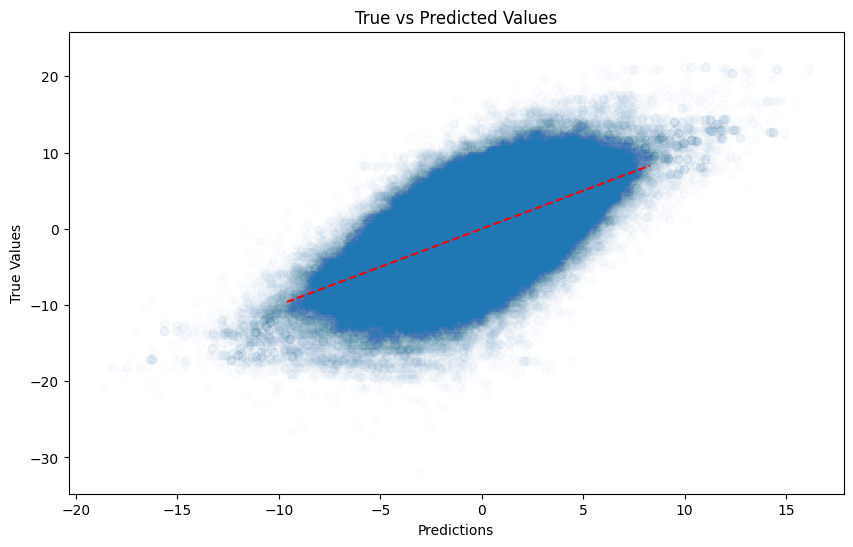

In [ ]:
plyr_long, plyr_epa_forecast = plyr_epa_forecaster(pbp_data, depth_charts, context_forecast_df, diagnostics=True, d_snaps=10, pca=False)

In [173]:
plyr_epa_forecast.describe()

position_label,play_id,C1,C2,C3,C4,CB1,CB2,CB3,CB4,CB5,CB6,CB7,CB8,DE1,DE2,DE3,DE4,DE5,DE6,DE7,DT1,DT2,DT3,DT4,DT5,DT6,DT7,FB1,FB2,FS1,FS2,FS3,FS4,ILB1,ILB2,ILB3,ILB4,ILB5,ILB6,LG1,LG2,LG3,LT1,LT2,LT3,MLB1,MLB2,MLB3,NT1,NT2,NT3,OLB1,OLB2,OLB3,OLB4,OLB5,OLB6,QB1,QB2,QB3,RB1,RB2,RB3,RB4,RB5,RG1,RG2,RG3,RT1,RT2,RT3,SS1,SS2,SS3,SS4,SS5,TE1,TE2,TE3,TE4,TE5,WR1,WR2,WR3,WR4,WR5,WR6,WR7,special1
count,33513.000000,30912.000000,10485.000000,1701.000000,136.000000,26007.000000,22805.000000,16375.000000,10686.000000,4727.000000,2210.000000,512.000000,8.000000,18963.000000,15355.000000,9567.000000,3832.000000,2322.000000,488.000000,62.000000,16536.000000,13408.000000,5776.000000,3446.000000,622.000000,52.000000,42.000000,3050.000000,115.000000,25509.000000,9613.000000,2635.000000,276.000000,20968.000000,13518.000000,4245.000000,1799.000000,224.000000,51.000000,25258.000000,3060.000000,46.000000,27955.000000,6358.000000,762.000000,8020.000000,1118.000000,393.000000,9603.000000,3062.000000,326.000000,20895.000000,15093.000000,7562.000000,3069.000000,977.000000,205.000000,27965.000000,4345.000000,502.000000,16938.000000,9616.000000,2909.000000,1702.000000,330.000000,25289.000000,4038.000000,61.000000,27304.000000,2835.000000,16.000000,26187.000000,6797.000000,3050.000000,203.000000,66.000000,19034.000000,14366.000000,6234.000000,1844.000000,81.000000,22767.000000,21154.000000,14434.000000,9849.000000,5252.000000,2019.000000,175.000000,75.000000
mean,2126.932563,-0.327402,0.331323,-7.948892,1.264734,2.833772,2.530563,2.497367,0.181422,-1.233498,-3.549559,1.210582,-26.027571,2.349605,2.397418,-0.197458,-2.103280,-1.759071,-5.078469,-12.273686,1.962184,3.419530,0.875776,4.745585,10.773114,-5.352541,5.223590,-7.419147,3.516120,2.744633,2.059007,0.141383,-12.580192,1.872669,1.494675,1.504497,4.776408,-9.831309,-6.260451,-0.926891,-0.913529,3.399904,-0.624449,0.404350,-0.771311,0.404391,1.920323,-0.319171,3.531532,1.204298,8.565195,3.544613,3.284816,6.790948,5.053532,-0.195369,-14.348607,2.272714,-8.892501,-3.615159,-0.511481,-1.379734,-0.817138,-4.621810,1.740931,1.877516,-7.738171,-12.284150,-0.594673,-10.342092,-2.176420,1.314584,-0.323849,-0.227004,38.504701,59.347684,3.138209,2.451220,1.872728,-4.067159,-1.297858,-0.229324,-1.392284,0.796981,1.732729,3.354580,2.175808,3.207066,7.957446
std,1247.552063,15.279829,18.814152,15.199836,3.534635,17.067077,16.698746,17.128620,16.262804,15.380454,13.334158,7.959635,1.708730,16.091401,17.713736,17.039943,15.536035,9.454479,6.489905,8.725608,15.965500,18.031712,13.803643,12.818838,15.296254,4.655294,2.734510,12.138149,4.947307,17.023488,17.388801,12.449898,17.881433,16.296359,14.686247,16.191658,11.077655,7.895022,15.446659,14.476028,15.161437,4.657285,15.889417,12.597351,12.816809,15.917688,15.653552,8.651522,14.869742,11.086154,9.976621,17.277926,16.870518,16.610947,20.663781,14.991658,12.007156,14.279644,14.464559,13.891443,16.613648,15.167758,13.656676,12.001553,8.124928,15.425548,12.097308,7.664959,16.178325,17.001662,2.513106,17.385466,19.423797,21.786832,25.429216,9.185686,16.313965,14.891732,11.671873,10.622590,5.184355,15.256286,16.395345,15.474732,15.542490,14.389246,15.464917,5.035893,6.667286
min,36.000000,-64.516258,-64.516258,-50.675739,-8.039095,-47.859798,-42.260162,-42.041454,-45.870174,-36.871250,-39.541767,-26.228533,-29.267990,-42.927147,-43.676754,-43.163853,-39.368210,-34.016495,-18.673809,-28.253738,-40.195042,-44.421108,-34.588730,-33.612778,-17.173580,-13.633138,-0.472250,-35.763603,-3.778601,-37.884979,-35.645267,-35.694984,-44.544296,-46.596214,-46.944111,-45.114182,-22.260492,-26.051706,-28.376055,-51.145359,-55.943848,-7.173388,-68.418388,-38.993343,-24.759169,-44.131927,-39.838573,-16.467276,-40.433235,-37.680645,-23.142120,-46.173145,-40.792267,-38.738880,-36.774696,-35.886772,-40.621521,-55.568485,-59.048149,-31.792139,-61.266670,-54.432320,-37.116158,-31.148317,-22.833157,-56.699810,-52.764015,-23.741499,-67.070374,-58.496822,-10.253726,-45.208012,-47.645435,-35.100842,

In [ ]:
model = XGBRegressor(n_estimators=5000, learning_rate=0.25, max_depth=10, reg_lambda=1.0, gamma=0.10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)
print(f'Test MSE: {mse:.3f}, R2: {rsquared:.3f}')

Test MSE: 177.672, R2: 0.186


Test MSE: 165.872, R2: 0.240


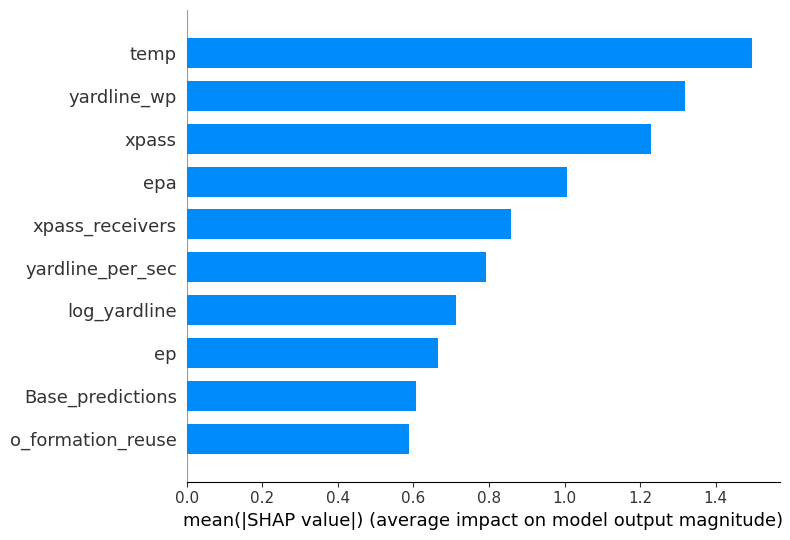

In [111]:
from sklearn.model_selection import train_test_split

# Calculate prediction errors
plyr_long['prediction_error'] = plyr_long['future_plyr_epa'] - plyr_long['expected_plyr_epa']

# Merge ['yards_gained', 'was_pressure', 'time_to_throw', 'play_type', 'yardline_100', 'offense_personnel', 'run_location'] from pbp_data
plyr_long = plyr_long.merge(context_forecast_df, on=['game_id', 'play_id'], how='left')

# Define X, y
X = plyr_long.drop(columns=['game_id', 'play_id', 'player_id', 'position_label', 'future_plyr_epa', 'expected_plyr_epa', 'prediction_error'])
y = plyr_long['prediction_error']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Fit the model
model = XGBRegressor(n_estimators=5000, learning_rate=0.25, max_depth=10, reg_lambda=1.0, gamma=0.10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)
print(f'Test MSE: {mse:.3f}, R2: {rsquared:.3f}')

# Fit SHAP
import shap
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type='bar', max_display=10)

## VOE Model

In [11]:
return

import itertools
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

# Merge plyr_epa_forecast and context_forecast_df
pbp_data_copy = plyr_epa_forecast.merge(context_forecast_df, on=['game_id', 'play_id'], how='left')

# Define X, y
X = pbp_data_copy.drop(columns=['game_id', 'play_id', 'epa', 'context_expected_epa', 'residual_epa'])
y = pbp_data_copy['residual_epa']

# Handle nan values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

scaler = StandardScaler()
kf = KFold(n_splits=2, shuffle=True, random_state=99)

# --- First stage: baseline model ---
base = MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=2000, alpha=0.25, tol=0.51, learning_rate_init=0.15)
base_preds = np.zeros(len(X))

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train = y.iloc[train_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    base.fit(X_train_scaled, y_train)
    base_preds[test_index] = base.predict(X_test_scaled)

### Define gridsearch function for EPA over expected model

def epa_over_expected_model_gridsearch(base_preds, plyr_epa_forecast, context_forecast_df, diagnostics=False, final_model=False):
    import warnings
    warnings.filterwarnings('ignore')
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Ridge
    from xgboost import XGBRegressor
    from sklearn.neural_network import MLPRegressor

    pbp_data_copy['base_pred'] = base_preds

    # --- Second stage: Add ridge_pred as feature and fit final model ---
    X2 = X.copy()
    X2['base_pred'] = base_preds

    final_preds = np.zeros(len(X2))
    for train_index, test_index in kf.split(X2):
        X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
        y_train = y.iloc[train_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        final_model.fit(X_train_scaled, y_train)
        final_preds[test_index] = final_model.predict(X_test_scaled)

    pbp_data_copy['voe_y1'] = final_preds

    if diagnostics:
        mse = mean_squared_error(y, final_preds)
        r2 = r2_score(y, final_preds)
        print(f'Ensemble Test MSE: {mse:.4f}, R2: {r2:.4f}')

    return pbp_data_copy

# Define hyperparameters for grid search
xgb_params = {
    'learning_rate': [0.001, 0.25],
    'max_depth': [1, 5],
    'reg_lambda': [0.01, 5],
    'gamma': [0.00001, 1]
}

mlp_params = {
    'hidden_layer_sizes': [(500,), (150, 125, 100, 75, 50)],
    'alpha': [0.01, 5.0],
    'learning_rate_init': [0.001, 0.25],
    'tol': [0.00001, 1]
}

# Container for results
from sklearn.metrics import mean_squared_error, r2_score
results = []

# Grid search for XGBoost
for lr, depth, reg_lambda, gamma in itertools.product(
        xgb_params['learning_rate'],
        xgb_params['max_depth'],
        xgb_params['reg_lambda'],
        xgb_params['gamma']
    ):
    model = XGBRegressor(n_estimators=2000, learning_rate=lr, max_depth=depth, reg_lambda=reg_lambda, gamma=gamma)
    print(f"\nRunning XGBRegressor( lr={lr}, depth={depth}, reg_lambda={reg_lambda}, gamma={gamma})")
    output = epa_over_expected_model_gridsearch(
        base_preds, plyr_epa_forecast, context_forecast_df, diagnostics=False, final_model=model
    )
    mask = output[['residual_epa', 'voe_y1']].notnull().all(axis=1)
    results.append({
        'model': 'XGBoost',
        'params': f'lr={lr}, depth={depth}, lambda={reg_lambda}, gamma={gamma}',
        'mse': mean_squared_error(output.loc[mask, 'residual_epa'], output.loc[mask, 'voe_y1']),
        'r2': r2_score(output.loc[mask, 'residual_epa'], output.loc[mask, 'voe_y1'])
    })

# Grid search for MLP
for layers, alpha, lr_init, tol in itertools.product(
        mlp_params['hidden_layer_sizes'],
        mlp_params['alpha'],
        mlp_params['learning_rate_init'],
        mlp_params['tol']
    ):
    model = MLPRegressor(hidden_layer_sizes=layers, alpha=alpha, learning_rate_init=lr_init, max_iter=2000, tol=tol)
    print(f"\nRunning MLPRegressor(layers={layers}, alpha={alpha}, lr_init={lr_init}, tol={tol})")
    output = epa_over_expected_model_gridsearch(
        base_preds, plyr_epa_forecast, context_forecast_df, diagnostics=False, final_model=model
    )
    mask = output[['residual_epa', 'voe_y1']].notnull().all(axis=1)
    results.append({
        'model': 'MLP',
        'params': f'layers={layers}, alpha={alpha}, lr_init={lr_init}, tol={tol}',
        'mse': mean_squared_error(output.loc[mask, 'residual_epa'], output.loc[mask, 'voe_y1']),
        'r2': r2_score(output.loc[mask, 'residual_epa'], output.loc[mask, 'voe_y1'])
    })

# Final results as DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='mse', ascending=True).reset_index(drop=True)
results_df

SyntaxError: 'return' outside function (2833105327.py, line 1)

In [3]:
import pandas as pd
import numpy as np

def position_folds_from_counts(position_labels: pd.Series, n_folds: int = 10, min_positions_per_fold: int = 3):
    """
    Creates stratified folds for position labels based on their frequency in the dataset.
    
    Parameters:
    - position_labels: pd.Series of position labels (e.g., from depth_charts_copy['position_label'])
    - n_folds: Number of folds to create.
    - min_positions_per_fold: Minimum number of positions in each fold.
    
    Returns:
    - folds: List of lists, where each sublist contains position labels to be zeroed out in that fold.
    """
    pos_counts = position_labels.value_counts()
    positions = pos_counts.index.tolist()
    
    # Sort by frequency
    sorted_positions = pos_counts.sort_values(ascending=False).index.tolist()

    # Assign positions to folds in round-robin, stratified by frequency
    folds = [[] for _ in range(n_folds)]
    for i, pos in enumerate(sorted_positions):
        folds[i % n_folds].append(pos)
    
    # Ensure each fold meets the minimum size
    for fold in folds:
        if len(fold) < min_positions_per_fold:
            # Borrow from the largest fold
            largest_fold = max(folds, key=len)
            while len(fold) < min_positions_per_fold and len(largest_fold) > min_positions_per_fold:
                fold.append(largest_fold.pop())

    # Return as dict if preferred
    return {f'fold_{i}': fold for i, fold in enumerate(folds)}

In [27]:
folds = position_folds_from_counts(pivot_long_both_sides(pivot_wide_both_sides(pbp_data[['offense_players', 'defense_players', 'game_id', 'play_id', 'play_type', 'season', 'week']]), depth_charts)['position_label'], 
                                   n_folds=30, 
                                   min_positions_per_fold=2)

# Example: print one fold
for fold_name, positions in folds.items():
    print(f"{fold_name}: {positions}")

fold_0: ['C1', 'DE3', 'RB4', 'CB8']
fold_1: ['LT1', 'NT1', 'OLB5', 'WR8']
fold_2: ['QB1', 'SS2', 'QB3', 'DT7']
fold_3: ['RT1', 'OLB3', 'DT5', 'C5']
fold_4: ['CB1', 'LT2', 'DE6', 'OLB8']
fold_5: ['RG1', 'TE3', 'FS4', 'FS6']
fold_6: ['LG1', 'DT3', 'MLB3']
fold_7: ['FS1', 'MLB1', 'ILB5']
fold_8: ['WR1', 'CB5', 'LT3']
fold_9: ['SS1', 'ILB3', 'CB7']
fold_10: ['CB2', 'QB2', 'OLB6']
fold_11: ['ILB1', 'WR5', 'NT3']
fold_12: ['WR2', 'LG2', 'WR7']
fold_13: ['TE1', 'RT2', 'RB5']
fold_14: ['DE1', 'DE4', 'SS4']
fold_15: ['OLB1', 'RG2', 'LG3']
fold_16: ['DT1', 'DT4', 'RT3']
fold_17: ['CB3', 'RB3', 'FS5']
fold_18: ['RB1', 'OLB4', 'DE7']
fold_19: ['WR3', 'NT2', 'RG3']
fold_20: ['DE2', 'FB1', 'TE5']
fold_21: ['ILB2', 'FS3', 'OLB7']
fold_22: ['TE2', 'SS3', 'DT6']
fold_23: ['DT2', 'ILB4', 'C4']
fold_24: ['OLB2', 'DE5', 'SS5']
fold_25: ['FS2', 'CB6', 'ILB6']
fold_26: ['CB4', 'WR6', 'MLB4']
fold_27: ['RB2', 'MLB2', 'QB4']
fold_28: ['C2', 'TE4', 'FB2']
fold_29: ['WR4', 'C3', 'special1']


In [4]:
def get_position_groups(depth_charts):
    """
    Returns a dictionary with keys for 'offense', 'defense', and position groups,
    and values as lists of position_labels belonging to each group.
    Only includes position_labels in offense/defense if they appear at least min_count times.
    """
    df = depth_charts.copy()
    df['formation'] = df['formation'].astype(str)
    df['position_label'] = df['position_label'].astype(str)
    df['position'] = df['position_label'].str.extract(r'([A-Za-z]+)', expand=False).str.upper()

    # Minimum count threshold
    min_count = df.shape[0] * 0.00025

    # Value counts for filtering
    label_counts = df['position_label'].value_counts()

    # Offense and defense groups, filtered by min_count
    offense_labels = (
        df[df['formation'].str.contains('Offense', case=False)]['position_label']
        .value_counts()
        [lambda x: x >= min_count]
        .index
        .tolist()
    )
    defense_labels = (
        df[df['formation'].str.contains('Defense', case=False)]['position_label']
        .value_counts()
        [lambda x: x >= min_count]
        .index
        .tolist()
    )

    # Position group mapping (customize as needed)
    position_group_map = {
        'qbs': ['QB'],
        'rbs': ['RB', 'FB'],
        'tes': ['TE'],
        'wrs': ['WR'],
        'ol': ['LT', 'LG', 'C', 'RG', 'RT', 'OL'],
        'dl': ['DE', 'DT', 'NT', 'DL'],
        'lbs': ['LB', 'MLB', 'OLB', 'ILB'],
        'cbs': ['CB'],
        'ss': ['SS', 'FS', 'S'],
        'special': ['K', 'P', 'LS', 'special']
    }

    group_dict = {
        'offense': offense_labels,
        'defense': defense_labels
    }

    for group, positions in position_group_map.items():
        mask = df['position'].isin([p.upper() for p in positions])
        group_labels = df[mask]['position_label'].unique().tolist()
        group_dict[group] = group_labels

    return group_dict

In [20]:
# Merge with future player performance data
pbp_data_copy = plyr_epa_forecast.merge(context_forecast_df, on=['game_id', 'play_id'], how='left')

MSE: 0.4535394342400719, R^2: 0.7674389119294831


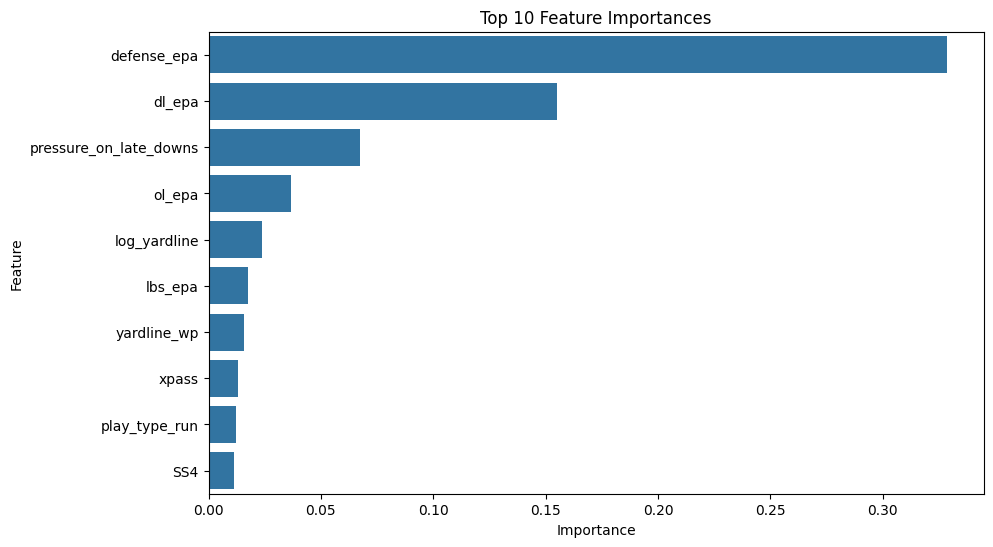

In [332]:
X_train, X_test, y_train, y_test = train_test_split(pbp_data_copy.drop(columns=['game_id', 'play_id', 'residual_epa', 'epa']), y, test_size=0.5, random_state=42)

model = XGBRegressor(n_estimators=5000, learning_rate=0.10, max_depth=10, reg_lambda=100.0, gamma=0.1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rsquared = r2_score(y_test, y_preds)
print(f'MSE: {mse}, R^2: {rsquared}')

# Feature importance
importances = model.feature_importances_
feature_names = pbp_data_copy.drop(columns=['game_id', 'play_id', 'residual_epa', 'epa']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

MSE: 0.4741333167005533, R^2: 0.7555357565515999


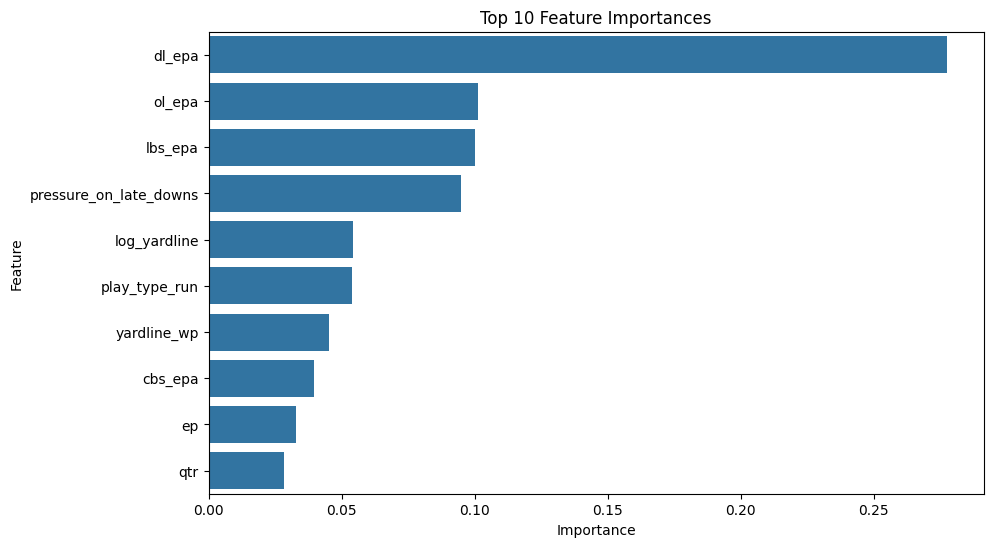

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Get position groupings
pos_groups = get_position_groups(clean_depth_charts(depth_charts))

# Sum all columns for each position group (qb, rb, te, etc.)
for group in ['qbs', 'rbs', 'tes', 'wrs', 'ol', 'dl', 'lbs', 'cbs', 'ss', 'special', 'offense', 'defense']:
    group_cols = [col for col in pos_groups.get(group, []) if col in pbp_data_copy.columns]
    pbp_data_copy[f'{group}_epa'] = pbp_data_copy[group_cols].sum(axis=1)

X = pbp_data_copy[['qbs_epa', 'rbs_epa', 'tes_epa', 'wrs_epa', 'ol_epa', 'dl_epa', 'lbs_epa', 'cbs_epa', 'ss_epa', 'special_epa',
                   'o_formation_reuse', 'variance_encoder', 'ep', 'dist_down', 'd_coverage_reuse', 'play_type_run', 'log_yardline', 
                   'pressure_on_late_downs', 'qtr', 'yardline_wp', 'xpass_receivers', 'prev_yards_gain', 'temp', 'xpass', 'yardline_per_sec']].fillna(0)
y = pbp_data_copy['residual_epa'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = XGBRegressor(n_estimators=5000, learning_rate=0.15, max_depth=10, reg_lambda=1000.0, gamma=0.1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rsquared = r2_score(y_test, y_preds)
print(f'MSE: {mse}, R^2: {rsquared}')

# feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [45]:
pbp_data_copy[['qbs_epa', 'rbs_epa', 'tes_epa', 'wrs_epa', 'ol_epa', 'dl_epa', 'lbs_epa', 'cbs_epa', 'ss_epa', 'special_epa',
                   'o_formation_reuse', 'variance_encoder', 'ep', 'dist_down', 'd_coverage_reuse', 'play_type_run', 'log_yardline', 
                   'pressure_on_late_downs', 'qtr', 'yardline_wp', 'xpass_receivers', 'prev_yards_gain', 'temp', 'xpass', 'yardline_per_sec',
                   'residual_epa']].corr().round(2)

,qbs_epa,rbs_epa,tes_epa,wrs_epa,ol_epa,dl_epa,lbs_epa,cbs_epa,ss_epa,special_epa,...,log_yardline,pressure_on_late_downs,qtr,yardline_wp,xpass_receivers,prev_yards_gain,temp,xpass,yardline_per_sec,residual_epa
qbs_epa,1.00,0.03,0.03,0.41,0.96,-0.83,-0.85,-0.85,-0.85,-0.02,...,-0.38,-0.12,-0.00,0.15,-0.22,0.21,-0.00,-0.22,-0.00,0.56
rbs_epa,0.03,1.00,-0.00,0.02,0.02,-0.02,-0.01,-0.02,-0.01,0.02,...,-0.02,0.01,0.00,0.01,0.00,-0.00,-0.01,0.00,-0.01,-0.01
tes_epa,0.03,-0.00,1.00,0.06,0.03,0.01,0.00,-0.04,-0.03,0.01,...,-0.01,-0.02,-0.00,0.01,-0.04,0.00,-0.02,-0.04,0.01,-0.02
wrs_epa,0.41,0.02,0.06,1.00,0.42,-0.36,-0.37,-0.37,-0.38,-0.03,...,-0.15,-0.04,0.01,0.07,-0.08,0.08,-0.01,-0.08,-0.01,0.23
ol_epa,0.96,0.02,0.03,0.42,1.00,-0.86,-0.88,-0.87,-0.87,-0.02,...,-0.39,-0.12,-0.00,0.15,-0.23,0.21,-0.01,-0.23,-0.01,0.58
dl_epa,-0.83,-0.02,0.01,-0.36,-0.86,1.00,0.85,0.86,0.86,0.01,...,0.38,0.11,-0.01,-0.12,0.20,-0.21,-0.01,0.21,0.00,-0.59
lbs_epa,-0.85,-0.01,0.00,-0.37,-0.88,0.85,1.00,0.87,0.89,0.03,...,0.37,0.12,-0.01,-0.13,0.21,-0.21,0.00,0.21,0.01,-0.58
cbs_epa,-0.85,-0.02,-0.04,-0.37,-0.87,0.86,0.87,1.00,0.86,0.02,...,0.35,0.13,-0.01,-0.14,0.20,-0.20,-0.00,0.21,0.01,-0.57
ss_epa,-0.85,-0.01,-0.03,-0.38,-0.87,0.86,0.89,0.86,1.00,0.02,...,0.36,0.13,-0.00,-0.15,0.22,-0.20,-0.01,0.22,0.01,-0.57
special_epa,-0.02,0.02,0.01,-0.03,-0.02,0.01,0.03,0.02,0.02,1.00,...,0.02,0.00,-0.03,0.02,-0.02,-0.01,-0.02,-0.02,-0.01,-0.02


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Get position groupings
pos_groups = get_position_groups(clean_depth_charts(depth_charts))

# Sum all columns for each position group (qb, rb, te, etc.)
for group in ['qbs', 'rbs', 'tes', 'wrs', 'ol', 'dl', 'lbs', 'cbs', 'ss', 'special', 'offense', 'defense']:
    group_cols = [col for col in pos_groups.get(group, []) if col in pbp_data_copy.columns]
    pbp_data_copy[f'{group}_epa'] = pbp_data_copy[group_cols].sum(axis=1)

X = pbp_data_copy[['qbs_epa', 'rbs_epa', 'tes_epa', 'wrs_epa', 'ol_epa', 'dl_epa', 'lbs_epa', 'cbs_epa', 'ss_epa', 'special_epa',
                   'o_formation_reuse', 'variance_encoder', 'ep', 'dist_down', 'd_coverage_reuse', 'play_type_run', 'log_yardline', 
                   'pressure_on_late_downs', 'qtr', 'yardline_wp', 'xpass_receivers', 'prev_yards_gain', 'temp', 'xpass', 'yardline_per_sec']].fillna(0)
y = pbp_data_copy['residual_epa'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPRegressor(hidden_layer_sizes=(20, 10, 5), max_iter=5000, alpha=0.10, tol=0.0005, learning_rate_init=0.00001)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rsquared = r2_score(y_test, y_preds)
print(f'MSE: {mse}, R^2: {rsquared}')

MSE: 8166.14473894156, R^2: -4232.451612071727


In [22]:
# define parameters
lr = [0.25, 0.10, 0.01]
md = [2, 8, 16]
lam = [1.0, 10, 1000]
gamma = [1, 0.02]

# Define the parameter grid
param_grid = {
    'learning_rate': lr,
    'max_depth': md,
    'lambda': lam,
    'gamma': gamma
}

# for loop over parameter grid
for lr in param_grid['learning_rate']:
    for md in param_grid['max_depth']:
        for lam in param_grid['lambda']:
            for gamma in param_grid['gamma']:
                print(f"Training model with lr={lr}, md={md}, lam={lam}, gamma={gamma}")
                model = XGBRegressor(learning_rate=lr, max_depth=md, reg_lambda=lam, gamma=gamma, n_estimators=5000)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                print(f"Model performance: {mean_squared_error(y_test, y_pred)}")
                

Training model with lr=0.25, md=2, lam=1.0, gamma=1
Model performance: 0.5289997435674519
Training model with lr=0.25, md=2, lam=1.0, gamma=0.02
Model performance: 0.4921500171099256
Training model with lr=0.25, md=2, lam=10, gamma=1
Model performance: 0.5298343201630864
Training model with lr=0.25, md=2, lam=10, gamma=0.02
Model performance: 0.4883492290645229
Training model with lr=0.25, md=2, lam=1000, gamma=1
Model performance: 0.5577042582048347
Training model with lr=0.25, md=2, lam=1000, gamma=0.02
Model performance: 0.48910210552211386
Training model with lr=0.25, md=8, lam=1.0, gamma=1
Model performance: 0.5273365435122482
Training model with lr=0.25, md=8, lam=1.0, gamma=0.02
Model performance: 0.5207047518547849
Training model with lr=0.25, md=8, lam=10, gamma=1
Model performance: 0.5157856352494379
Training model with lr=0.25, md=8, lam=10, gamma=0.02
Model performance: 0.504428392769967
Training model with lr=0.25, md=8, lam=1000, gamma=1
Model performance: 0.5124297739593

MSE: 0.5613031896211617, R^2: 0.7073961471956507


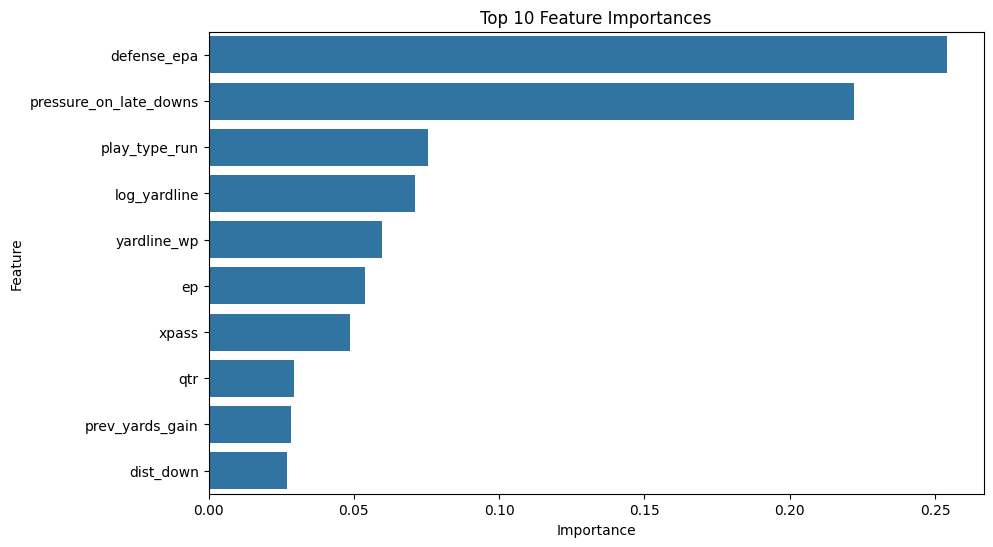

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Get position groupings
pos_groups = get_position_groups(clean_depth_charts(depth_charts))

# Sum all columns for each position group (qb, rb, te, etc.)
for group in ['qbs', 'rbs', 'tes', 'wrs', 'ol', 'dl', 'lbs', 'cbs', 'ss', 'special', 'offense', 'defense']:
    group_cols = [col for col in pos_groups.get(group, []) if col in pbp_data_copy.columns]
    pbp_data_copy[f'{group}_epa'] = pbp_data_copy[group_cols].sum(axis=1)

X = pbp_data_copy[['offense_epa', 'defense_epa',
                   'o_formation_reuse', 'variance_encoder', 'ep', 'dist_down', 'd_coverage_reuse', 'play_type_run', 'log_yardline', 
                   'pressure_on_late_downs', 'qtr', 'yardline_wp', 'xpass_receivers', 'prev_yards_gain', 'temp', 'xpass', 'yardline_per_sec']].fillna(0)
y = pbp_data_copy['residual_epa'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=5000, learning_rate=0.025, max_depth=10, reg_lambda=1.0, gamma=0.01)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rsquared = r2_score(y_test, y_preds)
print(f'MSE: {mse}, R^2: {rsquared}')

# feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

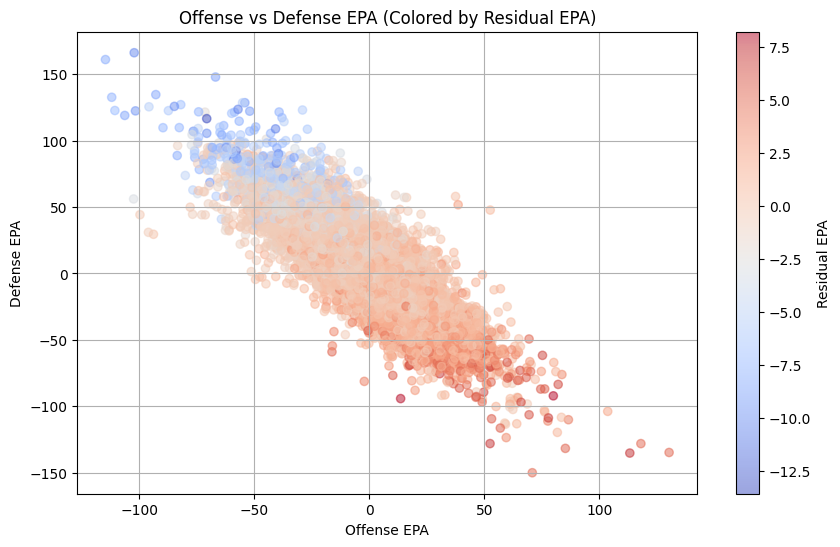

In [286]:
# Plot offense_epa and defense_epa, color code by residual_epa
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pbp_data_copy['offense_epa'], pbp_data_copy['defense_epa'], c=pbp_data_copy['residual_epa'], cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Residual EPA')
plt.xlabel('Offense EPA')
plt.ylabel('Defense EPA')
plt.title('Offense vs Defense EPA (Colored by Residual EPA)')
plt.grid()
plt.show()

In [287]:
# Get mean future EPA by player and position group, then merge with player names
grouped = plyr_long.groupby(['player_id'])['future_plyr_epa'].sum().reset_index()
grouped = grouped.merge(depth_charts[['gsis_id', 'full_name']].drop_duplicates(), left_on='player_id', right_on='gsis_id', how='left')
grouped = grouped.sort_values(['future_plyr_epa'], ascending=[False])

# Example: show top 5 for each group
grouped

,player_id,future_plyr_epa,gsis_id,full_name
1451,00-0034796,2074.4,00-0034796,Lamar Jackson
38,00-0025473,1966.4,00-0025473,Marshal Yanda
1420,00-0034752,1959.4,00-0034752,Orlando Brown
1244,00-0034281,1959.4,00-0034281,Bradley Bozeman
885,00-0032965,1726.4,00-0032965,Ronnie Stanley
...,...,...,...,...
802,00-0032580,-1715.7,00-0032580,Jonathan Jones
355,00-0030421,-1803.8,00-0030421,Jamie Collins
70,00-0027136,-1840.6,00-0027136,Jason McCourty
234,00-0029542,-1970.2,00-0029542,Stephon Gilmore


In [314]:
context_forecast_df.columns

Index(['game_id', 'play_id', 'epa', 'o_formation_reuse', 'variance_encoder', 'ep', 'dist_down', 'd_coverage_reuse', 'play_type_run', 'log_yardline', 'pressure_on_late_downs', 'qtr', 'yardline_wp', 'xpass_receivers', 'prev_yards_gain', 'temp', 'xpass', 'yardline_per_sec', 'Base_predictions', 'shrinked_preds', 'residual_epa'], dtype='object')

In [25]:
def epa_over_expected_model(pbp_data, plyr_epa_forecast, context_forecast_df, diagnostics=False, model='default', folds=60):
    # Turn off warnings
    import warnings
    warnings.filterwarnings('ignore')

    # Merge with future player performance data
    pbp_data_copy = plyr_epa_forecast.merge(context_forecast_df, on=['game_id', 'play_id'], how='left')

    # Define X, y
    X = pbp_data_copy.drop(columns=['game_id', 'play_id', 'epa', 'residual_epa', 'Base_predictions', 'shrinked_preds'], errors='ignore').fillna(0)
    y = pbp_data_copy['residual_epa'].fillna(0)

    # Initialize the mlp model
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBRegressor
    from sklearn.linear_model import Ridge
    from sklearn.neural_network import MLPRegressor

    # Initialize the model
    if model == 'default':
        model = Ridge(alpha=10.0)  # Default model is Ridge regression
    else:
        model = model  # Use the provided model

    # Get position groupings
    pos_groups = get_position_groups(clean_depth_charts(depth_charts))

    kf = KFold(n_splits=2, shuffle=True, random_state=99)

    oof_preds = np.zeros(len(X))
    oof_true = np.zeros(len(X))

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Sum all columns for each position group (qb, rb, te, etc.)
        for group in ['qbs', 'rbs', 'tes', 'wrs', 'ol', 'dl', 'lbs', 'cbs', 'ss', 'special']:
            group_cols = [col for col in pos_groups.get(group, []) if col in X_train.columns]
            X_train[f'{group}_epa'] = X_train[group_cols].sum(axis=1)
            X_test[f'{group}_epa'] = X_test[group_cols].sum(axis=1)

        # Keep only the group epa columns and other features
        context_forecast_df_cols = context_forecast_df.drop(columns=['game_id', 'play_id', 'residual_epa', 'epa', 'Base_predictions', 'shrinked_preds']).columns
        X_train = X_train[[col for col in X_train.columns if col.endswith('_epa') or col in context_forecast_df_cols]]
        X_test = X_test[[col for col in X_test.columns if col.endswith('_epa') or col in context_forecast_df_cols]]

        # Ensure no NaNs
        X_train = X_train.fillna(0.0)
        X_test = X_test.fillna(0.0)
        y_train = y_train.fillna(0.0)
        y_test = y_test.fillna(0.0)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        oof_preds[test_index] = y_pred
        oof_true[test_index] = y_test

        if diagnostics:
            fold_mse = mean_squared_error(y_test, y_pred)
            fold_r2 = r2_score(y_test, y_pred)
            print(f'Fold MSE: {fold_mse:.3f}, R2: {fold_r2:.3f}')

    # Apply model to the entire dataset
    pbp_data_copy['voe_y1'] = oof_preds

    # Diagnostics
    if diagnostics:
        # Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(pbp_data_copy['voe_y1'], pbp_data_copy['residual_epa'], alpha=0.01, linewidths=1, label='Overall')
        plt.ylabel('Observed epa')
        plt.xlabel('Predicted epa')
        plt.title('True vs Predicted Values (Overall)')
        plt.legend()
        plt.plot([y.quantile(0.025), y.quantile(0.975)], [y.quantile(0.025), y.quantile(0.975)], color='red', linestyle='--')
        plt.grid()
        plt.show()

    # Generate folds of position groups
    pbp_long = pivot_long_both_sides(pivot_wide_both_sides(pbp_data[['offense_players', 'defense_players', 'game_id', 'play_id', 'play_type', 'season', 'week']]), depth_charts)
    pos_folds = position_folds_from_counts(pbp_long['position_label'], 
                                   n_folds=folds, 
                                   min_positions_per_fold=1)
    
    # Get the means for each column in plyr_epa_forecast
    col_means = plyr_epa_forecast.mean()
    
    # Store the results for causal inference
    results_by_fold = []
    
    # Loop through folds and apply the model
    for fold in pos_folds.values():
        # Now fold is a list of position labels
        fold_data = pbp_data_copy.copy()
        cols_in_fold = [col for col in fold if col in fold_data.columns]

        # Replace selected columns in fold with the column means
        fold_data[cols_in_fold] = col_means[cols_in_fold].values

        # Sum all columns for each position group (qb, rb, te, etc.)
        for group in ['qbs', 'rbs', 'tes', 'wrs', 'ol', 'dl', 'lbs', 'cbs', 'ss', 'special']:
            group_cols = [col for col in pos_groups.get(group, []) if col in fold_data.columns]
            fold_data[f'{group}_epa'] = fold_data[group_cols].sum(axis=1)

        # Keep only the group epa columns and other features
        context_forecast_df_cols = context_forecast_df.drop(columns=['residual_epa', 'epa', 'Base_predictions', 'shrinked_preds']).columns
        fold_data = fold_data[[col for col in fold_data.columns if col.endswith('_epa') or col in context_forecast_df_cols]]

        # Apply the model to the fold data
        X_fold = fold_data.drop(columns=['residual_epa', 'game_id', 'play_id'])

        # Scale the features
        X_fold_scaled = scaler.transform(X_fold)

        # Make predictions with pretrained model
        y_fold_pred = model.predict(X_fold_scaled)

        # Store results
        fold_results = pd.DataFrame({
            'game_id': fold_data['game_id'],
            'play_id': fold_data['play_id'],
            'voe_y0': y_fold_pred
        })

        # Filter pbp_long for the current fold
        fold_pbp_long = pbp_long[pbp_long['position_label'].isin(fold)]
        
        # Filter pbp_long for the current fold
        fold_results = fold_results.merge(fold_pbp_long[['game_id', 'play_id', 'player_id']], 
                                           on=['game_id', 'play_id'], how='left')

        results_by_fold.append(fold_results)

    # After the for loop over folds:
    results_by_fold_df = pd.concat(results_by_fold, ignore_index=True)
    results_by_fold_df = results_by_fold_df[['game_id', 'play_id', 'player_id', 'voe_y0']].copy()

    # --- PREPROCESSING PIPELINE ---
    pbp_long = pbp_long.merge(pbp_data_copy[['game_id', 'play_id', 'voe_y1', 'residual_epa']], on=['game_id', 'play_id'], how='left')
    pbp_long = pbp_long.merge(results_by_fold_df[['game_id', 'play_id', 'player_id', 'voe_y0']], 
                              on=['game_id', 'play_id', 'player_id'], how='left')
    pbp_long['causal_voe'] = pbp_long['voe_y1'] - pbp_long['voe_y0']

    return pbp_long

In [16]:
import nfl_data_py as nfl

# Define the years to import
yrs = range(2018, 2020)

# Play-by-Play Data
pbp_data = nfl.import_pbp_data(years=yrs)

# Weekly Fantasy Data
weekly_fantasy_data = nfl.import_weekly_data(years=yrs)

# Depth Charts
depth_charts = nfl.import_depth_charts(years=yrs)

2018 done.
2019 done.
Downcasting floats.
Downcasting floats.


Initial size (GB): 0.718
After cumulative PCA: 1.011 GB
After rolling PCA: 1.067 GB
After consistency PCA: 1.090 GB
After clutch PCA: 1.112 GB
Fold MSE: 12.892, R2: 0.365
Fold MSE: 12.813, R2: 0.363


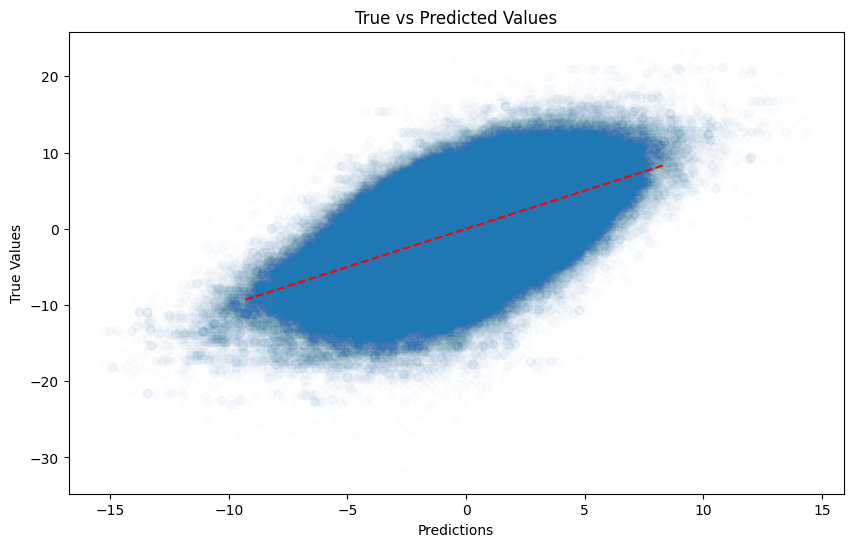

Feature Importance:
                   feature  importance
20                  dl_epa    0.223404
7   pressure_on_late_downs    0.145447
19                  ol_epa    0.135193
6             log_yardline    0.056077
21                 lbs_epa    0.051985
5            play_type_run    0.049033
9              yardline_wp    0.040272
2                       ep    0.039010
3                dist_down    0.034304
13                   xpass    0.030513
Fold MSE: 0.492, R2: 0.752
Feature Importance:
                   feature  importance
20                  dl_epa    0.218010
7   pressure_on_late_downs    0.182563
19                  ol_epa    0.114978
21                 lbs_epa    0.060467
5            play_type_run    0.055548
6             log_yardline    0.051930
9              yardline_wp    0.042025
13                   xpass    0.035574
2                       ep    0.034199
22                 cbs_epa    0.023191
Fold MSE: 0.498, R2: 0.737


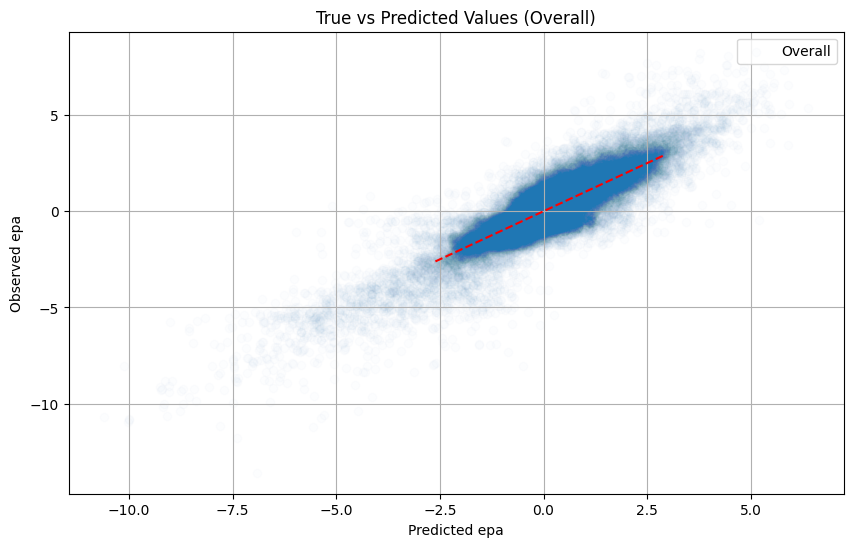

In [24]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np

xgb = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    max_depth=10,
    reg_lambda=1.0,
    gamma=0.05,
    colsample_bytree=1.0)

mlp = MLPRegressor(
    hidden_layer_sizes=(500, 500),
    tol=0.000001,
    alpha=1.05,
    learning_rate_init=0.25,
    max_iter=2000,
    random_state=9)

plyr_long, plyr_epa_forecast = plyr_epa_forecaster(pbp_data, depth_charts, context_forecast_df, diagnostics=True, d_snaps=10, pca=False)
causal_voe = epa_over_expected_model(pbp_data, plyr_epa_forecast, context_forecast_df, model=xgb, diagnostics=True)
causal_voe = causal_voe.groupby(['player_id', 'season', 'game_id'])[['causal_voe', 'residual_epa']].sum().reset_index()
causal_voe['week'] = causal_voe['game_id'].astype(str).str[5:7].astype(int)

pbp_weekly = causal_voe.merge(weekly_fantasy_data[['player_id', 'season', 'week', 'fantasy_points_ppr']], on=['player_id', 'season', 'week'], how='left')
pbp_weekly = pbp_weekly.sort_values(['player_id', 'season', 'week'])
pbp_weekly['future_fantasy_points'] = pbp_weekly.groupby(['player_id', 'season'])['fantasy_points_ppr'].shift(-1)
pbp_weekly['future_causal_voe'] = pbp_weekly.groupby(['player_id', 'season'])['causal_voe'].shift(-1)
pbp_weekly['future_residual_epa'] = pbp_weekly.groupby(['player_id', 'season'])['residual_epa'].shift(-1)

pbp_weekly.drop_duplicates(subset=['player_id', 'season', 'week'], inplace=True)

# Merge with cleaned depth charts
pbp_weekly = pbp_weekly.merge(clean_depth_charts(depth_charts)[['season', 'week', 'gsis_id', 'position_label', 'full_name', 'formation', 'club_code']],
                              left_on=['season', 'week', 'player_id'], 
                              right_on=['season', 'week', 'gsis_id'], how='left')

# Save data as excel c:\Users\Jack\Documents\GitHub\FFInsights\data
pbp_weekly.to_excel('c:\\Users\\Jack\\Documents\\GitHub\\FFInsights\\data\\pbp_weekly_data.xlsx', index=False)

In [338]:
# Correlation between causal_voe and future_fantasy_points
pbp_weekly[['causal_voe', 'future_causal_voe', 'future_fantasy_points', 'future_residual_epa']].corr()

,causal_voe,future_causal_voe,future_fantasy_points,future_residual_epa
causal_voe,1.000000,0.231921,-0.069023,-0.081443
future_causal_voe,0.231921,1.000000,-0.151532,-0.276375
future_fantasy_points,-0.069023,-0.151532,1.000000,0.286090
future_residual_epa,-0.081443,-0.276375,0.286090,1.000000


In [308]:
pbp_weekly['causal_voe'].describe()

count    18602.000000
mean        -0.053523
std          8.125929
min        -47.902040
25%         -3.623486
50%          0.022545
75%          3.728977
max         34.088697
Name: causal_voe, dtype: float64

## Data Quality

make two separate voe models/metrics. first one is prospective and looks only at associational tendencies to extrapolate individual player impact. the second one is retrospective by using the first voe and individual player stats to account for within-play importance. the second voe uses stats (sacks, catches, blocks) to assign participation scores and allocates the unexplained epa accordingly.

In [446]:
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np
import time

# Define lists of parameters
estimators = [700]
learning_rates = [0.01, 0.25, 0.001]
reg_lambdas = [0.001, 10]
max_depths = [3, 10]
gamma = [0.001, 10]

# Define models to test for all parameter combinations
xgb_models = {}
for n_est in estimators:
    for lr in learning_rates:
        for reg_lambda in reg_lambdas:
            for max_depth in max_depths:
                for g in gamma:
                    model_name = f"XGB_nest_{n_est}_lr_{lr}_lambda_{reg_lambda}_depth_{max_depth}_gamma_{g}"
                    xgb_models[model_name] = XGBRegressor(
                        n_estimators=n_est,
                        learning_rate=lr,
                        reg_lambda=reg_lambda,
                        max_depth=max_depth,
                        gamma=g,
                        random_state=42,
                        colsample_bytree=1.0, # the fraction of features to consider at each split
                    )

# Store results
results = []

# Feature engineering
pbp_weekly = weekly_fantasy_data.copy()

# Process each model
for model_name, model in xgb_models.items():
    start_time = time.time()

    # Generate causal VOE
    causal_voe = epa_over_expected_model(pbp_data, plyr_epa_forecast, context_forecast_df, model=model)
    causal_voe = causal_voe.groupby(['player_id', 'season', 'game_id'])[['causal_voe', 'residual_epa']].sum().reset_index()
    causal_voe['week'] = causal_voe['game_id'].astype(str).str[5:7].astype(int)

    # Merge and create future targets
    pbp_weekly = weekly_fantasy_data.merge(causal_voe, on=['player_id', 'season', 'week'], how='left')
    pbp_weekly = pbp_weekly.sort_values(['player_id', 'season', 'week'])
    pbp_weekly['future_fantasy_points'] = pbp_weekly.groupby(['player_id', 'season'])['fantasy_points_ppr'].shift(-1)
    pbp_weekly['future_causal_voe'] = pbp_weekly.groupby(['player_id', 'season'])['causal_voe'].shift(-1)
    pbp_weekly['future_residual_epa'] = pbp_weekly.groupby(['player_id', 'season'])['residual_epa'].shift(-1)

    pbp_weekly.drop_duplicates(subset=['player_id', 'season', 'week'], inplace=True)
    pbp_weekly.dropna(subset=['causal_voe', 'fantasy_points_ppr', 'future_fantasy_points'], inplace=True)

    # convert position to dummy variable
    pbp_weekly = pd.get_dummies(pbp_weekly, columns=['position'], drop_first=True)

    # Define features and targets
    position_cols = [col for col in pbp_weekly.columns if col.startswith('position_')]
    X = pbp_weekly[['causal_voe', 'fantasy_points_ppr'] + position_cols].fillna(0)
    X = X.drop(columns=['position_group'])
    y = pbp_weekly['future_residual_epa'].fillna(0)

    scaler = StandardScaler()
    rkf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=42)
    mse_list, r2_list, mae_list, var_list = [], [], [], []
    ridge = Ridge(alpha=1.0)

    for train_idx, test_idx in rkf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        ridge.fit(X_train_scaled, y_train)
        y_pred = ridge.predict(X_test_scaled)

        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        var_list.append(explained_variance_score(y_test, y_pred))

    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    elapsed_time = time.time() - start_time

    results.append({
        'model_name': model_name,
        'mean_r2': round(np.mean(r2_list), 3),
        'mean_mse': round(np.mean(mse_list), 3),
        'coef': round(ridge.coef_[0], 4),
        'pval': round(ols_model.pvalues.get('causal_voe', np.nan), 4),
        'autocorrelation': round(pbp_weekly['causal_voe'].corr(pbp_weekly['future_causal_voe']), 3),
        'fantasy_correl': round(pbp_weekly['causal_voe'].corr(pbp_weekly['future_fantasy_points']), 3),
        'voe_variance': round(np.std(pbp_weekly['causal_voe']), 3),
        'sum_voe_is_zero': round(np.sum(pbp_weekly['causal_voe'] == 0), 1),
        'elapsed_time': round(elapsed_time, 1)
    })

# Define features and targets
position_cols = [col for col in pbp_weekly.columns if col.startswith('position_')]
X_base = pbp_weekly[['causal_voe', 'fantasy_points_ppr'] + position_cols].fillna(0)
X_base = X_base.drop(columns=['position_group'])
y_base = pbp_weekly['future_residual_epa'].fillna(0)

scaler = StandardScaler()
rkf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=42)
mse_list, r2_list, mae_list, var_list = [], [], [], []
ridge = Ridge(alpha=1.0)

for train_idx, test_idx in rkf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    var_list.append(explained_variance_score(y_test, y_pred))

ols_model = sm.OLS(y_base, sm.add_constant(X_base)).fit()

results.append({
    'model_name': 'Non-VOE',
    'mean_r2': round(np.mean(r2_list), 3),
    'mean_mse': round(np.mean(mse_list), 3),
    'coef': round(ridge.coef_[0], 4),
    'pval': round(ols_model.pvalues.get('fantasy_points_ppr', np.nan), 4),
    'autocorrelation': round(pbp_weekly['fantasy_points_ppr'].corr(pbp_weekly['future_fantasy_points']), 4),
    'fantasy_correl': round(pbp_weekly['fantasy_points_ppr'].corr(pbp_weekly['future_fantasy_points']), 3),
    'voe_variance': 0,
    'sum_voe_is_zero': 0,
    'elapsed_time': 0
})

# Final summary DataFrame
xgb_results_df = pd.DataFrame(results)

# Break model_name into n_estimators, lr, lambda, depth
xgb_results_df[['n_estimators', 'lr', 'lambda', 'depth', 'gamma']] = xgb_results_df['model_name'].str.extract(
    r'XGB_nest_(\d+)_lr_([\d.]+)_lambda_([\d.]+)_depth_(\d+)_gamma_([\d.]+)'
)

# Save results to Excel
xgb_results_df.to_excel('c:\\Users\\Jack\\Documents\\GitHub\\FFInsights\\data\\xgb_results.xlsx', index=False)

In [447]:
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np
import time

# Define lists of parameters
layer_list = [(50, 50), (300, 300, 300)]
alpha_list = [0.01, 10]
lr_list = [0.01, 0.25]
tol_list = [1e+1, 1e-4]

# Define models to test for all parameter combinations
mlp_models = {}
for layers in layer_list:
    for alpha in alpha_list:
        for lr in lr_list:
            for tol in tol_list:
                model_name = f"MLP_layers_{'_'.join(map(str, layers))}_alpha_{alpha}_lr_{lr}_tol_{tol}"
                mlp_models[model_name] = MLPRegressor(
                    hidden_layer_sizes=layers,
                    alpha=alpha,
                    learning_rate_init=lr,
                    max_iter=1000,
                    tol=tol,
                    random_state=9
                )

# Store results
results = []

# Feature engineering
pbp_weekly = weekly_fantasy_data.copy()

# Process each model
for model_name, model in mlp_models.items():
    start_time = time.time()

    # Generate causal VOE
    causal_voe = epa_over_expected_model(pbp_data, plyr_epa_forecast, context_forecast_df, model=model)
    causal_voe = causal_voe.groupby(['player_id', 'season', 'game_id'])[['causal_voe', 'residual_epa']].sum().reset_index()
    causal_voe['week'] = causal_voe['game_id'].astype(str).str[5:7].astype(int)

    # Merge and create future targets
    pbp_weekly = weekly_fantasy_data.merge(causal_voe, on=['player_id', 'season', 'week'], how='left')
    pbp_weekly = pbp_weekly.sort_values(['player_id', 'season', 'week'])
    pbp_weekly['future_fantasy_points'] = pbp_weekly.groupby(['player_id', 'season'])['fantasy_points_ppr'].shift(-1)
    pbp_weekly['future_causal_voe'] = pbp_weekly.groupby(['player_id', 'season'])['causal_voe'].shift(-1)
    pbp_weekly['future_residual_epa'] = pbp_weekly.groupby(['player_id', 'season'])['residual_epa'].shift(-1)

    pbp_weekly.drop_duplicates(subset=['player_id', 'season', 'week'], inplace=True)
    pbp_weekly.dropna(subset=['causal_voe', 'fantasy_points_ppr', 'future_fantasy_points'], inplace=True)

    # convert position to dummy variable
    pbp_weekly = pd.get_dummies(pbp_weekly, columns=['position'], drop_first=True)

    # Define features and targets
    position_cols = [col for col in pbp_weekly.columns if col.startswith('position_')]
    X = pbp_weekly[['causal_voe', 'fantasy_points_ppr'] + position_cols].fillna(0)
    X = X.drop(columns=['position_group'])
    y = pbp_weekly['future_residual_epa'].fillna(0)

    scaler = StandardScaler()
    rkf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=42)
    mse_list, r2_list, mae_list, var_list = [], [], [], []
    ridge = Ridge(alpha=1.0)

    for train_idx, test_idx in rkf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        ridge.fit(X_train_scaled, y_train)
        y_pred = ridge.predict(X_test_scaled)

        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        var_list.append(explained_variance_score(y_test, y_pred))

    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    elapsed_time = time.time() - start_time

    results.append({
        'model_name': model_name,
        'mean_r2': round(np.mean(r2_list), 3),
        'mean_mse': round(np.mean(mse_list), 3),
        'coef': round(ridge.coef_[0], 4),
        'pval': round(ols_model.pvalues.get('causal_voe', np.nan), 4),
        'autocorrelation': round(pbp_weekly['causal_voe'].corr(pbp_weekly['future_causal_voe']), 3),
        'fantasy_correl': round(pbp_weekly['causal_voe'].corr(pbp_weekly['future_fantasy_points']), 3),
        'voe_variance': round(np.std(pbp_weekly['causal_voe']), 3),
        'sum_voe_is_zero': round(np.sum(pbp_weekly['causal_voe'] == 0), 1),
        'elapsed_time': round(elapsed_time, 1)
    })

# Define features and targets
position_cols = [col for col in pbp_weekly.columns if col.startswith('position_')]
X_base = pbp_weekly[['causal_voe', 'fantasy_points_ppr'] + position_cols].fillna(0)
X_base = X_base.drop(columns=['position_group'])
y_base = pbp_weekly['future_residual_epa'].fillna(0)
 
scaler = StandardScaler()
rkf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=42)
mse_list, r2_list, mae_list, var_list = [], [], [], []
ridge = Ridge(alpha=1.0)

for train_idx, test_idx in rkf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    var_list.append(explained_variance_score(y_test, y_pred))

ols_model = sm.OLS(y_base, sm.add_constant(X_base)).fit()

results.append({
    'model_name': 'Non-VOE',
    'mean_r2': round(np.mean(r2_list), 3),
    'mean_mse': round(np.mean(mse_list), 3),
    'coef': round(ridge.coef_[0], 4),
    'pval': round(ols_model.pvalues.get('fantasy_points_ppr', np.nan), 4),
    'autocorrelation': round(pbp_weekly['fantasy_points_ppr'].corr(pbp_weekly['future_fantasy_points']), 4),
    'fantasy_correl': round(pbp_weekly['fantasy_points_ppr'].corr(pbp_weekly['future_fantasy_points']), 3),
    'voe_variance': 0,
    'sum_voe_is_zero': 0,
    'elapsed_time': 0
})

# Final summary DataFrame
mlp_results_df = pd.DataFrame(results)

# Break model_name into layers, alpha, lr, tol
mlp_results_df[['layers', 'alpha', 'lr', 'tol']] = mlp_results_df['model_name'].str.extract(
    r'MLP_layers_([\d_]+)_alpha_([\d.]+)_lr_([\d.]+)_tol_([\de.-]+)'
)

# Save results to Excel
mlp_results_df.to_excel('c:\\Users\\Jack\\Documents\\GitHub\\FFInsights\\data\\mlp_results.xlsx', index=False)